In [2]:
def isPalindrome(s):
    def solve(s):
        if len(s) <= 1:
            return True
        if s[0] != s[-1]:
            return False
        return solve(s[1:-1])
    return solve(s)

for s in [
            'abcdefba',
            'aaaaaa',
            'aaabaaa',
            'abcddcba',
            'redivider',
            'malayalam',
            'abcdefghijklmnopqrstuvwxyztttttttttttttttzyxwvutsrqponmlkjihgfedcba'
         ]:
    print(f's = {s}')
    r = isPalindrome(s)
    print(f'r = {r}')
    print('==================')


s = abcdefba
r = False
s = aaaaaa
r = True
s = aaabaaa
r = True
s = abcddcba
r = True
s = redivider
r = True
s = malayalam
r = True
s = abcdefghijklmnopqrstuvwxyztttttttttttttttzyxwvutsrqponmlkjihgfedcba
r = True


In [3]:
def isPalindrome(s):
    def solve(s, left, right):
        if left >= right:
            return True
        if s[left] != s[right]:
            return False
        return solve(s, left+1, right-1)
    return solve(s, 0, len(s) - 1)

for s in [
            'abcdefba',
            'aaaaaa',
            'aaabaaa',
            'abcddcba',
            'redivider',
            'malayalam',
            'abcdefghijklmnopqrstuvwxyztttttttttttttttzyxwvutsrqponmlkjihgfedcba'
         ]:
    print(f's = {s}')
    r = isPalindrome(s)
    print(f'r = {r}')
    print('==================')


s = abcdefba
r = False
s = aaaaaa
r = True
s = aaabaaa
r = True
s = abcddcba
r = True
s = redivider
r = True
s = malayalam
r = True
s = abcdefghijklmnopqrstuvwxyztttttttttttttttzyxwvutsrqponmlkjihgfedcba
r = True


In [4]:
# Longest palindromic subsequence. s = 'bbbab' => ans = 4 ('bbbb'). s = 'cbbd' => ans = 2 ('bb')
def longestPalindromeSubseq(s):
    def LPS(i, j):
        #print(f'\t(i, j) = ({i}, {j})')
        if (i, j) in memo:
            return memo[(i,j)]
        if i == j:
            return 1
        if i > j:
            return 0
        if s[i] == s[j]:
            ans = 2 + LPS(i+1, j-1)
        else:
            ans = max(LPS(i+1, j), LPS(i, j-1))
        memo[(i,j)] = ans
        return memo[(i,j)]
    memo = dict()
    return LPS(0, len(s)-1)


for s in [
            'bbbab',
            'cbbd',
            'vgpfhgdxfl',
            'upvgarvtptjnjkbtusgskremmcmnkfnajkuloydxevabqsgvtqoovgbolsoiddqwjuuqgejfcvykorsybarsbcacnpoicsrqkwqr',
            'onibfnbkjdgpzfhxmwmamrosuulkovspjharpntwkjuvjzbjwrnykwvdfurnxkuuemmyxavkeowloobdgmpbxczuufgtmkcoqeqcyentbofyamtbzoklwmwxeeoicghvflguogmzbnevemnqacpsjeneepozkuqmgpqinhjyclifmxuuvnmhieyhlqcmfvifeyzjbmmnenfexedoeznaghvshlcwhigqcuxsgodwtbmhfbyrfydsbivfdzgjxveynrntlnwjdswxneksffkzdxrtmlltkrxxbsxskwjzouxqdyauklvsbbxawmdrbmytigvpfvoituonpwzlspyuliyaaepxklpeqledgfjlxbkhjdxuuekxxbpqkpznpziatwtmmrkltycyxfbbofothmyofkycaswcrphrrrndxrnkzmeumsdtpxunjrkyxnjutrbzmvxvajgnpwimvabjaxmvuamjkfapxsgdfihozwojazlnhgyj',
         ]:
    print(f's = {s}')
    r = longestPalindromeSubseq(s)
    print(f'r = {r}')
    print('========================')



s = bbbab
r = 4
s = cbbd
r = 2
s = vgpfhgdxfl
r = 3
s = upvgarvtptjnjkbtusgskremmcmnkfnajkuloydxevabqsgvtqoovgbolsoiddqwjuuqgejfcvykorsybarsbcacnpoicsrqkwqr
r = 34
s = onibfnbkjdgpzfhxmwmamrosuulkovspjharpntwkjuvjzbjwrnykwvdfurnxkuuemmyxavkeowloobdgmpbxczuufgtmkcoqeqcyentbofyamtbzoklwmwxeeoicghvflguogmzbnevemnqacpsjeneepozkuqmgpqinhjyclifmxuuvnmhieyhlqcmfvifeyzjbmmnenfexedoeznaghvshlcwhigqcuxsgodwtbmhfbyrfydsbivfdzgjxveynrntlnwjdswxneksffkzdxrtmlltkrxxbsxskwjzouxqdyauklvsbbxawmdrbmytigvpfvoituonpwzlspyuliyaaepxklpeqledgfjlxbkhjdxuuekxxbpqkpznpziatwtmmrkltycyxfbbofothmyofkycaswcrphrrrndxrnkzmeumsdtpxunjrkyxnjutrbzmvxvajgnpwimvabjaxmvuamjkfapxsgdfihozwojazlnhgyj
r = 172


In [5]:
# =================================================
# Sorting Explore Card - Radix Sort
# Problem: Query Kth Smallest Trimmed Number
# =================================================
def smallestTrimmedNumbers(nums, queries):
    def counting_sort(arr, pv):
        #print('=====')
        K = 10
        counts = [0] * K
        for elem, ind in arr:
            digit = elem[-pv]
            counts[int(digit)] += 1
        #print(counts)
        starting_index = 0
        for i, v in enumerate(counts):
            counts[i] = starting_index
            starting_index += v
        #print(counts)
        sorted_lst = [None] * len(arr)
        for elem, ind in arr:
            digit = elem[-pv]
            sorted_lst[counts[int(digit)]] = (elem, ind)
            counts[int(digit)] += 1
        return sorted_lst
    def radix_sort(arr, trim):
        #max_length = len(arr[0])
        place_val = 1
        arr = [(v, i) for i, v in enumerate(arr)]
        #while place_val <= max_length:
        while place_val <= trim:
            arr = counting_sort(arr, place_val)
            #print(arr)
            place_val += 1
        return arr
    res = list()
    for k, trim in queries:
        arr = nums[:]
        lst = radix_sort(arr, trim)
        res += [lst[k-1][1]]
    return res

# Main section
for nums, queries in [
                        #(['102','473','251','814'], [[1,1],[2,3],[4,2],[1,2]]),
                        #(['24','37','96','04'], [[2,1],[2,2]]),
                        (["242167185558041968677241544739418613342644382905277415747334686485704736226155350467127801954","625820089334839761015775491304544885660619809583066576413574095759305031975133183346173220672","682831870413635204210786157477412248834237204236891937504350537587059015083830520407030857033","086628747429625214503181539181080037348126576403443896518689670695633768494997544802107757432","480734188198169978646988457266115138537038384328957175254408448332495427657089820555656446388","611518928985805409538363634999526828113820213200994234235911965527728778287021336289138113382","608949942124130004623857889117391316878116295633554066809419690279037558220848865464405252466","504605643473292908963966240042845008418538938419577097614109198540854703256834131536340121594","486007932452797238303729274163028289944095515407688910245303089552533997644290005542903055970","271624705694937625538604977207945654142908766919968838599369965522244987949938780033946120451","115542996596491273770969977093027108913390479089099499698179228027541188859877976221125995055","914884670479597666889868326191557102457060510433440958444523311093190711707431789344953099578","434563858742514650942590973720008938986020024922023442949170027862760716233175025781427714731","851627915017296251880348274664228157324781617737375837137106867491408732038752959466321886867","999181593776600899542871764358243971628901601391319742044932037117527183444753413342952188010","484096759861636563616531072206370190164667337115619672278425971904032253702831728230819324381","724685500529084497909835561965996404275660882694842949634500898758061525092846238704133109704","723160889849930119536678471002800039002330024764005827849052806088357675188301108532106525443","769435604780805179990387842085040310688450636671929488421817138150964286860436802376241937773","253945588983301539856132011774955148929625444189739839988750037990464058735758106118128472730","849062002878898369537340441868366741421194812608596847209237523656403073287485191119554515629","432617586621223604983352527014279822730638131894420500321603313511146018104014508075875672332","330883120549564597826217820773875091743633971209401192975090430901504559943114081849692736525","373127085839270478585956730965383582665821239779074641836480603891573517645720384878876494134","596500082353346538232509299713130695581415800715805217705500301179683962472673008581339218363","206183373997833265264942880544950204993332528065525398309825553706145332512665831894703499030","975123815990592623752631276777729769410185276014197221663948573827670425939156672325555770181","235856401558054413794753150561684292056511366013226872251128241740099190092423012695989327596","153700342323523430174805034961081088507483263059321509323564100372456272204920696547963511299","997052791683569117437480938586485779591516261924230576977939243496936120125577075146640140078","245908738215278894974101054839005516672417497706561822316112945135557539644526093272071476427","170820712844154489637280052032109201139306305369274529212399454175359135069697444000401909751","168762388366918443495204263369734111605458778355475125055073328001998885939863783202787164913","433642982793250658461821774570044876141515635452220367869913955120213890535021054954606121131","382715568988979606728729127857728931111770223522896258681890159265421188892292818288298607330","661581165017008540526685277414787303426972757313098694911959010714209313270187195343666866561","631623862430953388157052142944878508960294414691815010546843134363784997437656562119325373276","699650752457288726760344905847215087950600949492189176561904106129076345069586327681878131907","124965340461998291791295363261726918118424322555541692922588051977194727814987066882536763137","624245507944036209620050255762210584355552045456061918607744881458091175666854136131627398835","943029715260804296753939026777546327621980749929666869700577017627724873566786748490660669786","675021517220035170488408932278534193069944139394002418737140645342688202768034551297977625865","759497607476508827984120799000615673168107904120920863587355832970510242597300637970063368921","795684402626010912011996722540767294881615762202354721084127260773122662103332321038021759224","128581636979531772228105654047695799561523483630071747274776366196464798069777091175932907454","255360647065816113332216164873190190362135943169406273647869897992716241393794191270621388092","863229644338217783741154255484477196660116194550270083980281941686051894257569704342760157875","855745849853596242034062311857095758947966809330911341983230944168464718641552104334740305101","322376205826035421232788267854545935713962538897571554877126305640928461676223858420531868376","319084108402640824911870586441047004154577185346395136645689977376645848247372536854883999856","399743109705626377163037642376216978629404846249426178034698626170906432233034344773492852245","086892119872047133195031896581018160922874212656325473385330825297344201642703441557343034458","239449462366592925383590072960984360780188518128196497738675494539429693920149900571419233187","748313376898068928361982545137224507110966991726202446616945404522413901950389737936538796794","038002508655183060965506013164045514846359114317600236934966457547327459847026826455682288815","379231569010550107720150912060408779264595223955355687336918321436359868372606726550698111832","488222678387148008513694725004729518050579639561559789780693118603833123997702314137693620223","386232378688385907544819179903290667933962820995444572624264356182261196957869449508900882087","847164813486821345830733001318437440310799691554821964923307838771795694930018589525082951515","573542518571817097241365890835671333635711333980901943212574743204973710782874725955296836697","966603111327195345498502693927857739462366084153978477653484260829219800600127757543278754086","184885541559067416747533616383296241467979607287406945864667147924848646767467141455269756834","041275899483876256907632432329710240619452268139410743293674414137116747590722590941983573776","225862316612474304530173520321454209643442105028833354461181225274961502303547812646212974393","272568910916963930934677258920167417440194275842952609541201107460324713854129233422727006124","708591358372676743427552811100216286608826180468351026761643935398569526830569032753759813065","028374742323790887395243485882547997227163013352682396557088005849367602049777862985034276923","024660357600308726297860780465266124577763681761107676869859181050453220780881884793516694912","518466649599915536949301962253256949531223567190705399534675350511812865784648896072289429641","355544734917954914383714461329126873049964465430499003162384474188396751955387153013306618355","538481230582134194075617989090498573273807492121764441305655525166900475462595931209279388637","807530968917979431524709148682026507915637275626625839449523407781238846241262375424361260549","571588584781314760378749121978298404334443292762075884343802797958562596145233268837520404694","733193885365171971597755834977173981904463812385500325095211773731533043991814051039766213048","830918694984767559245307423977359559983910332289918807089381949978538800669131668992088928115","243018383756134536524835468081575091471224695004888199635905920635012864513417578472989750833","247392500673004899874868504934049861801797338683713172980513805069807466937311297614128989916","126622829452896252285138496731870716368990209170417715305548674843371562745874380836885776479","584095402843064822255459997198455150534678899462202075682992718360231205226356782439882587498","735849644388018261585551184381027723911135267885590758578449267861231227720208884541348184866","380500476933162802532315422515648802230606840784254902827849897949060611949762601298377827413","905155669291069013836251974393727461893949005659287456480845829403829276634630165840840508508","973927138169972104495576541634494374375583345982537046947488667856625715459891255856503478313","443158197646444570854084219115525636151420729824290770247205224869404059993674979399059791020","592666254017920358673081419232922889585701217922127005437022923003588141466162652264556142697","818277617979379882302107938015742962003971730345378920163102333531720453888057875880433000391","331254210467539289180784747099184807669367822827563293398676671791855350199535647103042186220","360117445469338288159839620113977621328681212679531158342707278053585353483685003698016467446","861612593401710984926558901888781294726685795883399675714191520275820800399908651027599191862","265522197009694923908123392776144985965010755155385002901560904257196961379835811323124512501","921216810115681108979171287240719021137529979120881201542765058191894287070249519324817816007"], [[64,9],[59,13],[25,49],[14,82],[17,69],[42,50],[40,19],[52,34],[42,73],[42,53],[87,43],[2,37],[7,30],[25,87],[89,65],[88,2],[7,24],[61,13],[63,81],[23,35],[84,20],[70,42],[47,45],[11,75],[85,64],[78,14],[23,71],[38,81],[12,70],[60,50],[63,81],[8,41],[72,12],[88,73],[43,56],[79,19],[30,63],[61,76],[42,14],[37,66],[55,66],[49,58],[31,30],[85,2],[18,48],[52,82],[20,76],[64,9],[10,69],[18,59],[60,77],[85,76],[40,74],[62,48],[3,23],[13,1],[10,2],[31,93],[7,75],[27,2],[62,30],[51,39],[32,87],[78,47],[20,3],[17,13],[24,32],[6,69],[33,3],[82,24],[44,78],[86,53],[76,87],[76,20],[42,13],[13,41],[11,7],[12,35],[83,37],[55,54],[10,1],[1,45],[67,92],[76,62],[67,26],[32,13],[35,25],[69,68],[45,75],[57,28],[52,66]]),
                     ]:
    print(f'nums, queries = {nums}, {queries}')
    r = smallestTrimmedNumbers(nums, queries)
    print(f'r    = {r}')
    print('===================')


nums, queries = ['242167185558041968677241544739418613342644382905277415747334686485704736226155350467127801954', '625820089334839761015775491304544885660619809583066576413574095759305031975133183346173220672', '682831870413635204210786157477412248834237204236891937504350537587059015083830520407030857033', '086628747429625214503181539181080037348126576403443896518689670695633768494997544802107757432', '480734188198169978646988457266115138537038384328957175254408448332495427657089820555656446388', '611518928985805409538363634999526828113820213200994234235911965527728778287021336289138113382', '608949942124130004623857889117391316878116295633554066809419690279037558220848865464405252466', '504605643473292908963966240042845008418538938419577097614109198540854703256834131536340121594', '486007932452797238303729274163028289944095515407688910245303089552533997644290005542903055970', '271624705694937625538604977207945654142908766919968838599369965522244987949938780033946120451', '115542996596

r    = [55, 68, 0, 38, 57, 76, 81, 70, 71, 4, 15, 76, 17, 25, 78, 59, 20, 39, 90, 6, 16, 30, 57, 2, 30, 79, 34, 24, 15, 69, 90, 28, 12, 68, 33, 26, 13, 66, 50, 62, 29, 48, 4, 53, 19, 83, 77, 55, 72, 0, 79, 5, 59, 87, 74, 33, 80, 86, 50, 25, 3, 7, 78, 79, 52, 89, 20, 31, 15, 40, 32, 36, 77, 5, 46, 0, 45, 87, 12, 19, 15, 41, 23, 23, 18, 69, 19, 13, 5, 20, 27]


In [6]:
from typing import List
class Solution:
    def maximumGap(self, nums: List[int]) -> int:
        def counting_sort(arr, pv):
            #N = len(arr)
            K = 10
            counts = [0 for _ in range(K)]
            for elem in arr:
                digit = (elem // pv) % 10
                counts[digit] += 1
            # Prefix sums for the counts array
            starting_index = 0
            for i, v in enumerate(counts):
                counts[i] = starting_index
                starting_index += v
            # Now set up the sorted list
            sorted_lst = [0 for _ in range(N)]
            for elem in arr:
                digit = (elem // pv) % 10
                sorted_lst[counts[digit]] = elem
                counts[digit] += 1
            return sorted_lst
        def radix_sort(arr):
            max_elem = max(arr)
            place_value = 1
            while place_value <= max_elem:
                arr = counting_sort(arr, place_value)
                place_value *= 10
            return arr
        N = len(nums)
        lst = radix_sort(nums)
        res = 0
        for i in range(1, N):
            res = max(res, abs(lst[i] - lst[i-1]))
        return res

# Main section
for nums in [
    [750,865,757,938,722,153,891,694,801,331,873,960,921,720,667,453,573,863,871,6,604,488,862,228,768,922,443,451,956,714,812,749,277,362,476,341,233,602,407,874,767,693,513,864,59,21,36,684,633,229,999,670,201,550,286,96,959,289,535,745,67,559,675,190,27,852,382,814,271,223,76,263,593,471,859,510,441,806,603,660,382,107,909,93,136,268,612,459,658,75,153,20,364,950,549,316,707,508,951,345],
    [1027,4327,3829,5845,9504,7472,3667,9518,7844,7183,8519,8672,8595,4999,3673,6775,2398,5698,9596,617,5418,2721,9080,5892,5548,7811,7513,6653,6463,4929,3712,8624,8150,1975,8375,6223,7761,5665,913,7150,6661,8348,9054,3928,6908,6117,779,1498,5971,7224,5932,3251,438,9981,652,2597,4115,9800,8072,7669,8853,5968,3946,3661,9426,3225,3966,7182,5314,4679,2734,398,6695,8512,8380,1644,2119,190,9288,9478,4231,743,3122,343,5007,7685,1179,4916,7325,9500,5545,9895,797,2498,9990,5864,1941,4378,1467,1890,1348,5694,6112,824,2016,6628,7701,1382,2081,5784,5027,6323,3075,7308,7283,5492,9314,4732,9963,7332,1383,3251,8215,7863,24,9381,1868,9245,6906,6350,4389,9573,1945,4489,7462,8302,9220,2967,9520,4367,7378,759,8994,3207,7118,5429,1779,1586,1772,3149,2461,1559,7817,1498,4915,2829,7870,5375,8049,5057,9463,3270,978,719,3593,3528,1279,3251,9634,4894,8511,2943,2472,5660,3965,8732,5919,6137,3811,6868,3851,7072,7090,3913,707,5990,6649,6645,4842,6977,5560,5956,6337,5168,4807,1424,5755,8092,5963,9747,225,2933,2109,535,8881,8180,134,5466,2244,4844,1333,8222,1756,894,758,5015,246,3837,1658,4651,8509,3168,1621,3656,8503,4102,2604,6142,8737,5711,5607,7439,7863,5254,2184,2405,9904,9133,558,459,9480,1394,8426,7005,7992,7825,2828,416,1691,2263,1680,8300,6303,9425,8989,8105,2937,8715,7243,1014,1927,2597,7550,9655,2812,3449,3136,9145,8208,6010,2172,4155,5663,7769,1668,2399,7582,9639,2694,7744,49,5483,9,9390,1490,7007,7779,4723,8442,1986,6436,8971,4214,1623,6717,3775,2765,8227,9538,2585,2735,7017,1384,567,8644,142,2104,8926,5250,3979,1367,1294,8212,3995,1287,5929,255,2132,7210,9168,2693,4365,3335,6835,4254,7564,9648,3439,7974,7710,5374,6169,4839,2510,6079,9119,8946,1483,4510,5511,218,7954,6438,5044,1866,5966,867,6868,8285,3608,8153,5873,5742,3003,8029,241,18,3842,3557,5174,314,2472,4442,384,7056,9098,7133,8074,6712,8411,8487,3472,7948,4275,957,4029,3711,5002,3907,5932,6994,628,3009,7845,2822,8608,2012,5290,9931,3890,1145,597,9950,3959,5491,6554,8993,8698,1523,1953,4747,3204,4031,6477,3580,9823,1964,6760,2599,1380,6630,6055,8180,6546,7233,1110,7669,894,6057,6162,2246,1754,2355,8107,1127,3415,9851,9134,9838,3930,3540,5596,5981,1003,5006,8851,2886,3793,7234,6190,7310,7394,8923,8814,9770,8466,341,5374,8281,6215,7440,2825,679,2556,4053,2578,5881,8700,3960,3018,2822,7903,8405,8756,5062,6847,7354,8225,5157,1690,5637,5076,8098,2633,3958,2500,632,9813,2167,5120,605,8964,2913,1554,3850,4713,312,1250,4438,7036,91,3895,1584,9850,6384,1363,1832,3317,7387,961,2180,1371,4033,2063,2075,9924,463,6504,6286,926,3604,5936,7597,4031,4988,1937,4539,2910,3147,4436,5903,499,268,9079,6355,1114,9136,5961,5683,7576,4451,4004,5124,3605,6901,9495,8780,8821,424,4634,6531,6450,7219,2186,7865,8026,1424,3598,3040,5978,1391,9836,2854,9360,7232,8586,7984,8908,8537,9973,6237,5079,8306,4226,9901,4714,2398,7834,5551,3032,6284,1252,1498,7099,9710,9782,7374,9224,9947,670,1268,9416,9481,7044,745,2227,3186,7588,6510,2384,1424,2841,2043,6744,218,2598,9840,5990,7250,2006,4509,6660,4519,913,8953,3258,9971,1792,2214,2103,5674,5608,7380,3978,9065,7808,3204,8048,3831,9481,3484,8567,6819,257,9094,6358,9081,1347,907,7292,522,3168,6066,1501,849,7140,4382,637,213,5496,6952,1911,3528,4198,2074,3925,8932,1603,7182,5404,6444,8483,8436,7386,5614,8760,2256,1971,822,4042,6998,3878,4320,873,110,3126,2312,5084,5846,7574,4150,7608,9475,7674,8610,4064,4175,1912,6434,3695,5178,3919,4884,1710,2835,2382,5582,7165,5375,2926,6068,4830,2250,2531,2737,4592,9469,9328,4151,8759,74,6639,5325,7689,5931,6711,7656,9889,2999,9725,5752,550,4630,4062,1649,4788,7684,7548,2179,2222,9467,8665,5069,1565,3691,1969,5119,3779,5957,4187,1265,2226,4518,2192,841,7127,3846,2474,5967,8542,5648,3313,2533,732,6680,5142,6586,2623,1739,920,2974,2310,7866,2245,1855,7904,3315,2941,1505,8132,4653,2731,8049,6903,455,6050,1629,8195,4017,7820,711,4817,999,9958,5326,1843,8831,1480,9362,2374,6420,9112,6551,9028,2064,9489,4122,4026,8416,9937,5803,9259,3184,4860,1656,3722,1585,1112,764,2759,6357,9594,9821,2267,7883,7541,7447,1371,4381,1230,4239,678,4851,3786,7251,9979,6391,2542,3286,3881,2373,7195,7185,6239,3551,9128,5051,4878,3905,4415,7289,2921,1990,1484,482,3067,5596,6924,9156,98,8707,5943,5654,1319,5742,4057,5002,6937,1757,5403,3740,6614,5186,4400,9733,1527,1262,5113,4580,310,6885,7038,651,3728,3917,9920,5017,4148,3261,1490,8687,5500,7675,755,8586,4578,9229,7303,9925,9120,6433,4323,5677,7658,5366,9719,2882,6921,8756,214,6267,228,2054,8446,8700,5502,5913,6972,1182,647,7254,941,7208,5689,8746,9250,7768,2434,4757,1999,8787,2114,8829,7582,522,8759,1002,6127,5270,3336,2359,4355,8447,4163,4290,117,3522,114,9296,9778,2226,8481,2511,6429,2686,6019,9669,5931,5200,8963,5089,886,6818,6603,6155,8419,2807,5174,7240,3859,6335,3827,6702,8569,1467,8672,5876,1721,1597,5697,2615,402,8395,2821,8180,8798,7193,5937,2095,2669,2290,2489,478,9226,8726,5948,1745,3582,8308,3450,793,8717,6177,4445,3332,2484,3683,9493,38,8784,7171,6778,2115,2079,7674,8345,8224,1090,6227,5210],
]:
    print(f'nums = {nums}')
    sol = Solution()
    r = sol.maximumGap(nums)
    print(f'r = {r}')
    print('=====================')


nums = [750, 865, 757, 938, 722, 153, 891, 694, 801, 331, 873, 960, 921, 720, 667, 453, 573, 863, 871, 6, 604, 488, 862, 228, 768, 922, 443, 451, 956, 714, 812, 749, 277, 362, 476, 341, 233, 602, 407, 874, 767, 693, 513, 864, 59, 21, 36, 684, 633, 229, 999, 670, 201, 550, 286, 96, 959, 289, 535, 745, 67, 559, 675, 190, 27, 852, 382, 814, 271, 223, 76, 263, 593, 471, 859, 510, 441, 806, 603, 660, 382, 107, 909, 93, 136, 268, 612, 459, 658, 75, 153, 20, 364, 950, 549, 316, 707, 508, 951, 345]
r = 39
nums = [1027, 4327, 3829, 5845, 9504, 7472, 3667, 9518, 7844, 7183, 8519, 8672, 8595, 4999, 3673, 6775, 2398, 5698, 9596, 617, 5418, 2721, 9080, 5892, 5548, 7811, 7513, 6653, 6463, 4929, 3712, 8624, 8150, 1975, 8375, 6223, 7761, 5665, 913, 7150, 6661, 8348, 9054, 3928, 6908, 6117, 779, 1498, 5971, 7224, 5932, 3251, 438, 9981, 652, 2597, 4115, 9800, 8072, 7669, 8853, 5968, 3946, 3661, 9426, 3225, 3966, 7182, 5314, 4679, 2734, 398, 6695, 8512, 8380, 1644, 2119, 190, 9288, 9478, 4231, 743, 3122,

In [7]:
#
#  Dijkstra's Algorithm for path with minimum cost between nodes
#       5
#  1 ------- 2
#  | \ 2   / | \
#  |  \   /  |  \ 9
#  |   \ / 4 |   \
#  |1   5    |1   6
#  |   / \   |   /
#  |  /1  \1 |  / 1
#  | /     \ | /
#   3 ------ 4
#       4
#

import heapq
from collections import defaultdict
def minimum_cost(edges, start, end):
    def dijkstra():
        # Each element of heap is the tuple: (total_cost, node)
        h = [(0, start, [start])]
        heapq.heapify(h)
        seen = set()
        seen.add((0, start))
        while h:
            #print(f'\th, seen = {h}, {seen}')
            total_cost, node, total_path = heapq.heappop(h)
            if node == end:
                return (total_cost, ' -> '.join([str(x) for x in total_path]))
            for next_node, cost in hsh[node]:
                if (total_cost + cost, next_node) not in seen:
                    seen.add((total_cost + cost, next_node))
                    heapq.heappush(h, (total_cost + cost, next_node, total_path + [next_node]))
    hsh = defaultdict(list)
    for u, v, c in edges:
        hsh[u].append((v, c))
        hsh[v].append((u, c))
    #for k in sorted(hsh):
    #    print(k, sorted(hsh[k]))
    res = dijkstra()
    return res

for edges, start, end in [
                            ([[1,2,5],[1,5,2],[1,3,1],[2,5,4],[3,5,1],[4,2,1],[4,5,1],[4,3,4],[2,6,9],[6,4,1]], 1, 6),
                            ([[1,2,5],[1,5,2],[1,3,1],[2,5,4],[3,5,1],[4,2,1],[4,5,1],[4,3,4],[2,6,9],[6,4,1]], 6, 2),
                            ([[1,2,5],[1,5,2],[1,3,1],[2,5,4],[3,5,1],[4,2,1],[4,5,1],[4,3,4],[2,6,9],[6,4,1]], 6, 5),
                            ([[1,2,5],[1,5,2],[1,3,1],[2,5,4],[3,5,1],[4,2,1],[4,5,1],[4,3,4],[2,6,9],[6,4,1]], 5, 6),
                            ([[1,2,5],[1,5,2],[1,3,1],[2,5,4],[3,5,1],[4,2,1],[4,5,1],[4,3,4],[2,6,9],[6,4,1]], 2, 3),
                         ]:
    print(f'edges, start, end = {edges}, {start}, {end}')
    r = minimum_cost(edges, start, end)
    print(f'Minimum cost = {r}')
    print('==================')


edges, start, end = [[1, 2, 5], [1, 5, 2], [1, 3, 1], [2, 5, 4], [3, 5, 1], [4, 2, 1], [4, 5, 1], [4, 3, 4], [2, 6, 9], [6, 4, 1]], 1, 6
Minimum cost = (4, '1 -> 5 -> 4 -> 6')
edges, start, end = [[1, 2, 5], [1, 5, 2], [1, 3, 1], [2, 5, 4], [3, 5, 1], [4, 2, 1], [4, 5, 1], [4, 3, 4], [2, 6, 9], [6, 4, 1]], 6, 2
Minimum cost = (2, '6 -> 4 -> 2')
edges, start, end = [[1, 2, 5], [1, 5, 2], [1, 3, 1], [2, 5, 4], [3, 5, 1], [4, 2, 1], [4, 5, 1], [4, 3, 4], [2, 6, 9], [6, 4, 1]], 6, 5
Minimum cost = (2, '6 -> 4 -> 5')
edges, start, end = [[1, 2, 5], [1, 5, 2], [1, 3, 1], [2, 5, 4], [3, 5, 1], [4, 2, 1], [4, 5, 1], [4, 3, 4], [2, 6, 9], [6, 4, 1]], 5, 6
Minimum cost = (2, '5 -> 4 -> 6')
edges, start, end = [[1, 2, 5], [1, 5, 2], [1, 3, 1], [2, 5, 4], [3, 5, 1], [4, 2, 1], [4, 5, 1], [4, 3, 4], [2, 6, 9], [6, 4, 1]], 2, 3
Minimum cost = (3, '2 -> 4 -> 5 -> 3')


In [8]:
#
# QuickSort algorithm
#

def sort_list(nums):
    def quick_sort(arr):
        if not arr:
            return arr
        N = len(arr)
        # Choice of the pivot is very important in QuickSort! In some books, arr[0] is set as pivot.
        # That's a bad choice because in that case each iteration will be for an array of length N-1.
        # lower_pivot will be [] and higher_pivot will be the (N-1) length array. In Python, that
        # results in maximum recursion limit exceeded. The pivot should ideally divide the array into
        # chunks of approximately the same size.
        pivot = arr[N//2]
        #pivot = arr[0]
        pivots = [x for x in arr if x == pivot]
        lower_pivot = quick_sort([x for x in arr if x < pivot])
        higher_pivot = quick_sort([x for x in arr if x > pivot])
        return lower_pivot + pivots + higher_pivot
    return quick_sort(nums)

for nums in [
               [1,2,3,4,5],
               [-6,3,2,-9,10,8,2,5,-10,10],
               [-84,70,16,67,-20,-93,-56,40,29,-8,-74,61,-57,-8,10,-4,91,-75,34,76,21,75,8,-28,61,78,-52,-17,-25,-9,10,67,5,-90,-21,-16,90,68,6,-81,62,46,60,-3,17,-21,-8,-84,-50,-71,-41,64,38,-70,-78,34,64,2,-9,-80,-39,48,51,63,82,7,-39,-42,36,-44,66,-98,-87,29,-62,-12,68,78,-12,-63,45,78,-66,-25,-32,45,43,75,-12,31,-11,-30,-62,-90,-27,-32,13,-19,-84,0],
               #[-205,845,-75,-489,-747,-356,196,-807,-320,981,-459,-929,-699,-835,164,336,350,204,530,734,525,938,-203,-808,423,-485,-207,863,216,180,605,-100,345,535,74,504,376,-333,436,-71,-599,188,-46,715,-289,361,-851,181,656,-383,-684,708,-728,-276,273,39,-215,-784,10,-214,89,-673,730,-577,788,-310,749,751,-77,344,673,202,-313,-832,240,907,277,-246,176,-827,-872,-421,395,245,587,322,-903,-975,831,-447,-427,-520,85,896,-595,-30,704,-151,547,155,-893,926,472,604,104,658,93,278,-512,775,-612,320,666,-282,-292,-760,-456,-565,-526,-371,-121,921,532,-108,-176,267,-838,834,-839,-713,404,-504,886,-713,20,-251,-518,-1000,224,13,-650,232,-358,267,-584,352,57,-417,-874,243,-825,-365,339,-11,-544,782,-362,993,-597,23,-235,383,-907,483,-910,434,225,262,83,309,-326,-276,-603,-273,687,-170,-107,-707,488,-917,397,197,-763,-659,-348,-110,-706,709,810,-12,582,751,-978,-396,-39,-860,172,-637,-283,320,-836,-911,-553,-261,-788,852,-780,-857,-144,-535,754,-681,514,691,429,-558,-376,934,-329,541,-917,235,659,252,-202,137,535,98,-581,630,891,-763,-704,-354,-464,-589,-550,105,548,-875,762,-880,-282,31,-972,-666,270,-989,-731,844,-871,597,195,-462,615,619,-828,-313,-292,164,-18,-19,330,-238,98,956,963,-399,-687,-479,-654,-429,411,-954,-393,575,-324,-216,-500,829,827,-787,-596,103,-48,-356,-807,-229,927,-497,-755,765,-120,525,-555,127,-991,831,-71,-474,9,409,536,-795,-330,-749,286,605,499,647,-910,608,-401,-469,85,-845,-197,647,38,371,872,-737,-694,231,-559,-205,-616,-293,237,955,728,111,254,-210,231,458,-567,-789,-129,-31,-850,-267,596,375,823,-281,-532,-436,925,-315,802,980,-234,904,-64,311,-933,61,664,-567,419,-407,-294,-890,996,569,-188,694,290,633,-482,-32,565,-865,291,-90,759,880,-587,-728,769,-295,720,-222,513,-58,-85,-737,283,629,-118,743,325,-401,239,-228,-697,-247,-704,456,274,251,-118,825,-876,-479,-64,774,490,895,-661,-110,644,-506,-232,-946,-832,-284,-789,804,-349,-868,-800,483,-347,490,50,-127,215,-624,880,160,558,-373,738,30,-832,34,-386,323,812,8,-305,26,-409,835,798,-77,-6,-942,262,248,-442,-837,-861,-266,244,693,-877,-479,-132,485,201,-837,694,251,951,554,865,107,-929,-633,-314,307,857,-441,779,-297,91,-727,797,-100,213,741,-874,-847,100,-720,-960,608,-901,166,-625,-483,-62,668,538,99,-746,-744,-961,847,-517,6,24,-496,-434,-933,7,442,533,-767,-681,-437,-415,861,176,536,-58,-521,246,743,-846,637,-754,668,-130,-616,602,-90,226,-113,-108,-838,422,425,-718,768,-406,275,-877,117,326,-420,364,-165,-121,-875,511,-177,-684,-690,107,564,866,143,162,401,-195,223,854,206,-341,615,-98,-216,631,-517,-156,197,-204,603,507,516,542,-293,-109,-220,-218,-687,-236,816,-518,523,135,-755,-542,131,-701,250,507,93,400,969,-85,-481,733,358,48,327,73,-675,732,-709,-109,816,164,541,-66,435,-304,365,-659,-713,-327,476,960,614,-239,-13,-108,791,569,-119,-96,376,57,-562,-736,137,448,-569,561,991,704,-702,-75,78,334,579,319,-507,442,147,289,862,191,348,816,957,780,-669,-362,627,-251,912,985,341,122,-659,-626,-685,493,494,278,-939,-923,685,-336,631,82,722,978,64,-781,-916,-750,-469,611,-798,312,658,397,488,-400,641,-201,218,348,527,-629,264,-507,89,-379,-992,691,-106,-833,-895,-545,768,635,281,-660,363,924,374,-741,115,-904,-555,970,-934,183,-276,-625,84,-95,-37,865,-799,-827,917,-110,-82,400,-291,-441,585,-690,924,-922,-982,258,945,-276,231,226,989,-777,831,532,780,-90,-868,-810,185,-452,603,-849,312,831,137,141,-665,-392,-548,3,-29,262,289,760,66,151,750,452,941,-740,731,198,175,-885,-772,-667,-750,377,952,-399,-799,29,-980,-592,-516,-160,115,180,-367,-720,211,848,587,-441,-624,-731,-977,-654,-244,618,-945,-717,-745,-634,-711,884,-452,210,-177,-158,-183,-642,688,426,618,955,526,590,-387,-151,-250,865,74,587,-211,543,902,-574,-3,-576,-673,262,-68,377,-974,-444,-858,-99,-61,3,198,-497,934,-362,884,296,-416,-539,65,-468,450,-368,-491,-218,-593,-764,831,492,88,-890,-813,377,567,314,-863,752,-477,511,852,-658,-896,-545,390,931,-972,-125,-208,656,-649,886,-371,-908,-365,400,415,-24,555,-198,-493,281,-178,990,-520,-115,-933,311,-173,505,-254,-739,-436,-232,961,265,-803,-362,-771,-801,562,982,304,743,990,-806,-887,883,-318,459,-844,202,493,-68,-932,710,64,296,129,-381,868,-972,-868,97,-360,284,579,-185,370,323,-688,-149,-694,-11,417,-164,668,-414,-41,-981,-358,-969,978,681,580,-171,101,390,-765,-659,979,-861,914,-182,142,-636,-411,-556,-267,-635,655,778,624,-874,727,286,-647,-256,344,-347,-801,-253,-97,-507,-317,314,266,979,37,608,434,460,-938,553,381,-834,-137,-732,121,700,-102,-168,-30],
               #[-598,651,502,-373,116,-939,-250,790,-869,669,-309,-15,-737,782,-500,-150,338,-165,913,-52,-459,-263,585,-311,-285,632,527,-984,-21,349,703,-865,611,-306,-314,948,143,506,511,901,-689,-111,-231,654,159,-609,214,-86,-278,929,376,693,-574,620,24,-505,-756,475,595,-241,802,764,4,14,484,668,945,649,452,-149,720,652,893,77,750,-789,-990,-574,-409,864,-461,606,-635,-713,321,702,705,211,-78,436,-926,-322,-328,420,608,-871,687,28,493,-883,390,620,-113,-670,907,853,-810,-742,-664,-546,972,843,648,-204,190,433,-241,-704,429,180,-977,-293,-692,462,-269,353,846,-108,834,-921,-538,-137,-886,-667,457,271,31,-275,-80,-97,-979,166,-520,-306,243,-369,-497,-468,-362,-387,417,-652,-852,832,570,235,542,582,161,319,-488,-600,175,-815,720,452,155,-982,914,-926,-616,-31,-907,174,624,-95,-146,-650,503,701,870,-790,747,450,-430,-324,-130,732,-499,-967,-836,-128,433,125,843,-893,77,352,-806,-523,-39,-234,-659,-545,616,-411,435,-359,-792,-21,152,-602,-432,92,-511,-815,959,729,967,744,5,-482,-180,-248,-767,-862,-228,727,-36,803,-889,240,-459,-381,-401,529,-209,704,533,-790,-653,-652,-715,609,411,346,-776,-332,-857,874,823,-677,303,602,830,-673,978,-718,-976,382,650,754,-615,-867,-937,-882,-829,-380,512,-423,-549,796,-531,795,289,878,219,-845,171,-166,126,646,-466,448,-389,-553,462,244,-752,-911,348,64,8,405,-219,-866,181,124,-998,-641,912,-848,809,-306,-537,-940,768,511,-365,236,413,284,103,-878,476,-111,735,-640,-737,234,-461,-76,242,-365,-879,441,758,-397,241,-353,317,211,805,462,731,629,-24,268,-693,455,540,50,493,528,-719,592,534,358,-60,-945,785,-414,302,733,-42,-594,905,-443,133,-863,-986,317,303,-563,639,-956,-296,646,814,784,-569,178,-756,144,633,519,654,174,-86,17,-139,116,-773,97,427,-338,-630,304,271,273,908,385,1000,492,873,901,-439,-848,917,883,-341,359,246,-635,-933,551,-103,-794,120,-790,-532,313,-178,-212,504,615,421,245,935,-493,239,398,983,40,-736,-872,10,-10,-272,911,-243,-480,-924,281,868,-343,318,776,-187,-881,-316,73,-621,449,-922,78,-950,312,-715,256,354,-382,743,-35,240,-896,300,-391,978,-191,638,-253,-277,406,-920,291,802,311,395,886,-522,-400,753,-660,858,676,431,-993,556,579,-989,396,150,-694,862,-384,-368,964,-931,-650,-424,-692,-773,-483,46,-239,-892,216,-570,39,-763,417,460,18,-406,824,465,-565,-238,-845,-616,947,-501,-38,-553,822,-240,449,-669,-949,863,-412,70,256,943,667,542,782,275,-989,-89,620,-368,352,-688,383,896,-267,-206,-768,-717,792,60,-418,-448,140,-402,-664,-773,236,-654,617,274,-714,965,-185,-98,268,-72,241,-121,-801,353,-330,779,-749,-125,-52,-319,81,945,-953,180,15,-199,264,244,263,-381,964,-818,790,545,-867,-279,43,210,-595,184,-302,67,730,-354,947,-772,-270,-788,-96,-679,869,-888,-80,361,358,840,-407,-933,38,757,698,-425,-959,385,103,995,731,-608,-576,-475,-880,-77,325,-284,163,-549,-646,-481,-16,923,-127,-324,190,65,11,-671,-323,427,823,-602,762,323,-261,-179,621,-110,-583,-424,893,934,-818,964,-407,-333,-557,-447,618,-15,-989,152,-363,557,839,-899,-81,-259,880,522,530,-234,-634,195,-699,-372,-77,597,645,-618,-554,-693,676,106,521,203,-58,-332,-540,849,-15,62,-583,421,-419,388,-822,-866,125,566,-983,169,-347,-352,-799,106,-571,977,83,-282,-521,345,-685,-69,-462,-814,662,-512,-932,-966,694,-365,-841,21,651,-517,-270,-587,-17,335,843,-796,-311,84,24,-118,-563,-593,626,442,696,-498,362,-630,511,602,-692,89,313,583,577,825,-421,696,-371,-37,-921,419,756,489,-393,787,-797,-828,799,739,-958,852,-986,-768,664,53,-409,6,315,-98,-714,680,-134,-169,-447,-472,343,806,-471,-641,284,-575,-838,-181,927,589,889,415,7,681,-333,967,-848,116,-778,-926,847,954,690,49,180,-608,-335,110,-542,295,526,987,-742,-186,626,642,708,-257,-570,528,75,337,-393,-183,-20,-816,285,-765,135,-177,446,-90,-425,358,261,-492,-567,840,-681,-308,969,613,680,-265,-743,256,43,236,-472,-704,298,147,-768,965,895,386,287,369,-348,900,147,-177,-914,329,171,938,-925,-809,845,-494,746,660,-435,896,528,602,-986,678,-944,-922,190,-132,297,499,519,-409,-219,-300,444,127,36,803,-432,-733,-877,953,296,353,-827,899,-368,-88,424,923,-625,-136,475,-649,-284,-721,335,-353,-312,-72,-343,745,-333,-880,-864,-735,918,813,-277,783,-161,631,389,-652,-39,397,-168,754,-201,-157,444,-660,790,-884,301,-659,-685,891,-307,539,164,138,6,-849,243,-357,-454,276,4,-945,555,820,-882,-279,-769,394,303,827,167,824,691,942,-710,421,-856,-712,-936,-916,457,283,-757,-374,840,-326,450,-934,-166,-14,296,-305,634,-162,-956,-829,-920,-196,605,-987,930,83,-463,-36,317,522,-496,-579,-763,517,115,-439,-941,994,72,-155,527,319,90,-533,-121,-169,167,-317,278,-98,-244,245,-302,-322,-796,-659,-661,356,-720,-64,-429,614,775,335,246,-874,949,-29,392,-978,-138,-862,428,827,870,-500,-266,-757,169,212,756,598,471,-134,893,-596,-742,763,-688,598,-580,884,-542,-53,-988,280,-372,356,-545,-799,410,-250,-629,-730,50,175,-542,278,837,580,148,-158,-997,-713,59,535,885,490,665,-47,893,-793,311,-272,-185,-736,-557,543,-364,-584,-953,79,244,445,742,650,-11,-632,890,703,970,144,265,318,-942,-328,453,102,82,436,433,672,-463,25,-940,-583,975,70,-982,370,993,234,-988,15,248,-252,835,521,-46,169,-751,-202,858,62,-809,-233,-730,104,-37,-62,-363,371,-497,493,-572,-511,662,203,65,-803,623,-803,-379,-346,-938,-605,640,-511,-450,-581,238,16,206,-406,-64,609,999,-156,-278,434,-658,-687,-843,422,-959,-725,-914,-858,-66,-307,-875,612,737,48,-346,818,-717,-66,927,987,-153,523,-56,-891,980,388,-75,-421,369,551,-130,904,592,-813,81,59,914,751,144,-445,-515,434,-663,127,486,329,-786,-768,-699,680,350,416,-171,43,244,-912,301,375,-574,-722,356,-984,-547,-197,20,991,992,287,700,-445,-1,982,79,-224,282,142,-547,-228,26,670,495,40,769,-149,208,-18,988,708,84,124,840,595,-162,-595,-594,-97,616,-758,-716,345,691,103,130,-641,356,-389,-99,-422,511,443,-680,145,-714,977,-240,970,151,-578,955,-165,-606,-118,-847,-741,62,42,859,566,843,-283,363,-31,288,-670,-168,789,-452,708,394,-699,-373,-794,624,167,-116,-328,176,913,-723,225,873,-953,-13,448,711,253,824,184,986,-35,-99,850,649,380,-155,-936,306,391,86,927,377,-969,737,973,-306,954,-664,442,-415,-391,228,-454,-111,823,736,320,-615,-797,-796,448,451,-895,-172,-640,-823,445,-3,691,689,-455,840,-818,-452,-290,506,-267,-971,361,-447,165,103,-740,290,306,124,-321,-613,369,-152,55,760,-1000,-164,656,-116,-297,-403,-396,153,322,503,942,268,753,-236,-984,-672,-779,781,-301,-278,-269,-802,376,236,-550,346,-708,35,-336,540,-995,-177,25,671,-307,307,-836,732,511,-533,-650,697,900,27,-485,25,970,-369,592,-489,247,292,934,-155,-985,423,-725,-833,918,-578,-253,830,867,944,-307,778,-816,-214,710,205,645,58,-640,278,-403,528,-38,-6,-944,483,-780,-343,-315,383,303,-982,855,-364,306,-645,457,819,884,25,312,-213,-123,230,733,-467,894,670,984,-757,-404,-940,198,306,-384,844,524,571,-50,-871,-348,652,-126,978,-529,242,-41,-945,-646,-442,-865,143,-610,481,-957,-124,396,547,567,-715,-736,-911,-669,-820,191,-242,-190,-371,-289,728,580,671,940,-568,-343,916,-637,536,623,-858,273,-913,-431,-280,-396,-467,-516,38,-122,680,843,-417,-700,147,-176,-457,-68,-476,762,521,-307,334,223,-234,-138,445,649,-551,5,-758,745,-30,735,-405,-307,-995,-911,-336,360,398,783,-281,751,670,-252,489,439,-269,-516,676,551,-681,-823,125,-848,226,-120,647,604,-749,-823,876,-247,-85,-90,-868,-89,-571,-21,-224,328,-677,156,-432,742,254,-494,-953,410,-98,-945,-940,11,624,750,-11,-326,-36,-757,-457,-338,-444,55,371,108,527,385,-872,-983,-798,815,-239,-797,286,-830,-983,-671,-33,473,-972,141,-574,274,-937,-526,125,995,225,-993,723,-272,885,744,950,-244,229,-456,597,136,-763,-608,-431,277,-498,250,750,250,-612,69,19,-672,-693,-32,53,-855,365,-41,545,-329,-447,-725,47,-758,243,311,-530,-663,883,-209,-456,-915,993,226,-400,870,166,-139,812,250,-230,-93,994,448,-709,907,475,428,-742,-143,-515,-64,-727,464,894,62,-747,-322,843,375,360,-709,-623,-816,-630,-952,57,-844,-665,68,-832,884,-693,582,457,-633,755,-814,-496,-878,386,144,910,74,837,-515,509,-752,-614,-458,-859,-450,553,479,870,-344,-361,122,185,563,-965,-61,-992,543,397,-670,-520,244,-642,91,747,-951,867,33,705,-292,-498,883,151,345,161,703,762,434,454,-739,888,641,-783,-525,832,-520,884,699,-383,-281,564,-114,-311,927,-409,214,-326,96,253,701,-405,829,907,996,898,-883,-43,-809,-601,-746,-900,-250,580,-835,-759,-741,-539,532,48,-157,569,-609,940,490,-476,773,180,372,-958,-944,868,866,-298,48,635,-81,343,-860,868,855,461,-248,-619,-860,714,-380,722,-876,911,-169,313,653,788,590,428,642,172,768,-960,995,-821,-513,-995,535,280,870,-385,444,620,-84,-941,-903,603,303,411,-377,-799,-878,438,996,-67,61,-822,5,-754,316,370,-805,-530,-674,93,-953,-813,630,-600,980,747,-934,-251,940,-301,446,-707,492,804,-548,-375,568,-401,573,550,520,-833,-321,481,34,-615,-444,874,279,591,160,536,-997,836,-814,86,791,-423,-11,919,-880,131,264,-42,438,-675,-870,109,303,970,935,-463,-848,-908,448,-760,-445,622,-695,-126,-494,124,-972,-246,749,-653,708,77,-169,3,-919,-509,-925,-446,35,-329,569,479,-684,-273,-560,-156,973,-994,64,852,87,535,-905,258,285,389,623,-849,189,769,-886,-587,457,694,73,-551,-184,5,-220,-432,349,-197,911,-765,-603,651,-837,-407,181,-490,-264,-817,235,695,321,-634,185,-929,161,-250,-375,877,879,-345,63,687,-379,-486,966,-519,-476,-904,-877,-978,319,-656,-830,140,-74,-529,177,200,218,-206,51,-782,-712,889,-922,175,-886,926,-386,-674,869,497,-507,823,-619,-180,377,141,-248,478,-581,663,277,419,975,-841,-657,109,358,-706,-488,417,325,-249,37,712,-417,-314,-453,301,891,804,-558,-865,699,610,-953,-509,691,778,849,-645,893,772,739,998,542,645,84,-607,720,-145,-43,-111,-738,-856,829,-74,723,597,827,253,455,-3,727,454,-903,155,510,-509,16,867,259,492,-886,53,-171,-380,-39,-590,-687,408,-808,903,757,-753,75,527,867,684,361,77,-585,325,602,-435,706,810,969,-467,881,-198,478,-160,-784,-846,69,736,-335,22,248,333,-403,-991,456,374,-542,956,-870,482,-523,11,-220,217,13,831,143,145,215,609,-52,-631,986,-430,786,840,-708,-30,426,681,308,810,53,710,-615,-575,-345,919,-730,-121,424,959,383,49,-189,321,-689,221,-115,-584,-33,-924,-842,503,-454,111,-408,445,-274,-483,468,767,-944,-363,-207,855,-180,-695,9,-238,243,-826,53,-518,-987,615,-424,-208,-100,433,131,-216,-647,282,-776,5
               #[-438,-916,532,89,612,-504,-805,840,-316,742,157,594,-294,-965,856,26,754,305,-308,183,230,613,732,946,44,-150,-287,-124,-984,259,-206,461,-894,-209,330,504,-656,-668,724,-77,-644,808,-384,-263,-126,-261,-196,-870,898,702,426,-843,-337,-62,709,585,649,697,-535,-37,287,-190,382,-278,-560,-509,58,705,-972,536,-304,-539,434,-339,-924,-712,206,81,906,100,-308,479,867,194,368,401,382,298,-850,406,-404,-217,155,-88,601,-65,-131,-818,-675,-117,-576,-69,-802,-679,823,-626,105,949,976,437,354,-909,-868,-650,387,62,870,184,495,71,-445,28,-502,-875,-640,-99,137,-702,-232,-507,-756,279,-916,-952,-561,-244,-994,-634,-707,439,-566,-803,278,-374,-772,-173,745,-151,199,-780,171,-458,-699,556,-969,-329,301,996,-884,-518,-285,252,248,-61,723,-801,738,-492,-205,331,254,830,-808,-907,-404,715,307,-567,-83,-573,470,-725,-776,933,20,110,-144,-509,-250,583,-537,-784,-47,475,-86,-973,-173,140,-887,-439,665,-876,361,572,33,-577,-47,212,497,-879,-505,958,831,547,360,385,216,422,-829,-101,-224,-220,533,-77,-1,997,46,452,517,-501,-817,804,-63,923,-334,329,698,187,739,426,910,121,240,-783,-618,-376,-896,721,798,-232,919,40,-801,173,-402,-972,991,-541,-300,213,-278,-12,-771,-441,607,-835,-82,-72,285,-464,-834,277,-830,781,828,22,145,904,-505,-757,-25,-783,-272,760,-448,956,327,-182,-503,870,203,117,-654,-361,517,43,-391,893,246,302,-928,52,735,766,-393,-885,55,27,36,-69,933,904,269,-254,34,450,463,98,-236,544,81,-693,811,138,554,-408,181,841,-853,-377,-1000,-932,536,-975,-254,-46,859,295,886,584,246,571,170,188,-810,-173,194,-245,934,951,-853,-712,-530,966,-827,-371,-493,-530,735,858,-12,-472,-412,288,539,-676,-116,-6,-482,891,911,-670,-72,180,62,-888,266,-683,799,-268,-830,-598,435,476,-496,964,-469,882,894,-142,-426,-567,-417,-311,724,730,-820,387,146,172,-836,-808,249,-806,613,-96,324,-157,908,952,-573,-261,907,663,659,427,984,659,45,386,-366,-969,-786,609,438,482,-708,230,853,467,-631,-178,555,392,831,258,786,-346,577,281,-918,148,-290,-999,-158,-554,39,736,-895,188,1000,-879,105,-701,-528,967,-192,404,-449,184,623,-79,-797,207,373,448,180,-335,-920,-491,218,-503,756,-43,652,-943,851,719,848,982,37,-752,-508,742,341,421,654,-52,-512,-618,-439,-50,749,-782,-355,651,-155,-928,-850,-886,-232,-754,-680,-498,-798,748,-409,-65,961,932,661,-793,-227,-952,904,-757,505,-549,748,30,-740,113,658,569,-422,-111,481,-918,-120,-823,-671,809,929,-223,-445,476,379,-566,-208,308,568,696,74,513,468,-923,-3,444,-531,-205,-123,-509,-237,239,-591,546,-195,657,-456,-93,285,166,-193,633,-112,-473,793,145,-387,431,-104,-210,378,69,24,-496,272,-141,613,-580,-903,135,-938,-631,426,-475,-874,-343,-436,65,-915,240,-218,178,-770,647,-519,528,-707,-50,-118,-248,576,-155,732,475,146,646,-807,-858,-159,-214,-880,484,-340,-885,858,896,-405,-946,-572,454,-22,59,-490,-322,152,-191,-389,-140,-455,459,-30,391,935,-361,-309,346,259,-327,-188,-507,-796,-249,824,610,498,405,-298,-440,-44,798,-18,-162,542,-425,241,-50,928,-681,-624,-902,-203,-95,-499,785,759,711,-49,492,-803,-21,876,706,760,-598,-99,571,425,958,142,-751,186,325,160,919,466,352,-786,-70,123,0,-457,-390,-528,538,86,-334,-372,692,-697,254,348,-36,-674,246,726,-56,975,-110,537,-774,-350,432,-783,968,524,830,-534,-571,719,-137,836,-513,-210,-438,-323,600,609,966,822,744,336,-740,426,-984,-559,-130,686,92,-482,-739,-301,-118,83,-972,820,-283,730,28,340,825,-144,-344,-152,224,365,256,-181,-511,-285,247,227,510,362,-625,-550,-461,-993,-575,-610,-896,-784,1000,358,313,428,-376,-449,295,-762,400,-547,921,-188,-492,594,528,525,-714,175,229,936,-965,934,-616,34,-311,-731,855,753,23,30,935,374,-278,32,134,-865,-700,436,-451,336,-395,23,-683,-547,-460,-815,-760,-292,-8,-705,-388,-659,-690,-155,585,-940,-22,200,-939,171,-584,-334,444,68,-954,-831,178,444,-964,865,916,237,-876,-342,-247,74,-444,594,711,816,612,174,-114,-837,-874,-898,750,628,962,968,-62,405,553,-579,-597,131,-681,-790,-131,-181,259,929,119,249,-26,-510,-106,-291,-988,511,-527,205,239,320,-435,-640,-843,739,-401,-332,-145,-586,-739,-836,12,-52,-649,911,-36,-28,403,443,934,635,490,292,953,-934,73,30,166,447,-555,-778,640,360,776,-969,-403,-632,-943,-652,985,-323,558,-982,630,-459,-110,631,-704,517,434,585,638,33,-398,-531,944,-916,-245,936,-969,-165,-903,423,-299,-477,-393,-55,-729,78,395,-298,-613,254,-221,253,-919,-566,-467,978,253,-333,-480,-238,139,256,602,-14,716,-46,-970,-468,-829,878,-873,657,-898,-568,-425,723,-911,598,-672,995,-873,-42,-536,708,116,-238,830,943,-70,488,-811,-732,-782,373,-193,21,-176,-654,583,568,627,-853,142,-528,71,404,921,219,-63,10,-219,226,-153,-178,638,120,815,-501,-677,-720,977,447,-707,-34,753,223,810,-960,554,-645,-890,-469,-607,967,-31,-602,965,-128,-254,-536,-181,368,893,-606,58,-730,432,-846,-297,566,81,47,-575,825,984,-144,-111,-63,270,525,948,-78,-639,700,-360,371,238,-829,-230,864,891,782,362,-721,819,55,-625,812,662,-844,-234,709,-884,-170,-587,-342,-899,202,825,-977,146,-907,242,-350,-71,-595,-940,-361,-797,550,-201,-895,-490,-538,263,-382,949,-877,-791,-149,-294,-554,94,331,895,626,-689,-764,837,-569,-78,391,204,118,615,964,-263,-940,958,244,769,637,887,632,198,523,-206,999,-654,-211,428,890,-383,-528,-591,-674,823,-477,85,-675,-580,-551,770,-140,-357,-344,-263,314,-100,510,961,16,512,149,261,-242,-89,-337,876,238,113,-944,-714,-679,-590,-500,245,-703,-344,-714,-413,897,-99,145,541,-751,887,656,765,-850,-538,197,129,-209,774,-394,881,789,502,-516,-543,-847,608,917,536,-132,814,-856,313,335,-184,996,-937,-722,83,-833,829,-457,963,997,429,-529,-836,-519,-768,-235,129,356,-252,-476,21,-955,-215,-153,-359,840,-103,547,594,669,948,376,859,513,-838,-115,-44,679,28,215,-858,-438,-706,185,871,-399,-35,280,798,485,679,-354,339,287,590,720,971,-604,728,-370,-19,-44,-848,-868,681,-884,224,704,-868,-961,-19,811,721,-733,-124,745,62,-977,34,-743,497,294,-16,73,-591,-450,-358,439,562,-786,806,-90,836,-262,-384,598,221,-156,-277,-897,650,-128,-365,-91,-735,13,356,59,-396,607,278,-645,465,-68,-769,-375,-408,388,-665,-429,106,-415,-840,-225,-823,-9,-643,728,-321,-478,361,-486,899,901,-330,71,-57,909,-562,-945,-631,-711,-551,-776,-825,884,-205,948,715,768,-59,175,825,-844,-20,908,-165,210,812,-609,-460,971,-462,420,-360,757,-894,-786,953,-717,374,802,-486,970,-533,459,-889,-882,-147,-177,646,339,554,376,-453,593,-701,-183,-23,169,109,-999,-576,185,-820,-838,683,-123,562,-178,361,-690,-509,-732,-92,-850,-643,819,867,-577,-254,-296,439,-123,-557,385,776,581,-350,300,-527,-121,-293,17,927,266,-461,197,940,-715,-989,-147,137,648,7,-429,228,-61,-698,-517,110,-937,918,795,-941,-275,5,603,-313,297,154,-826,678,442,312,-991,-619,-350,456,219,926,502,-182,-153,-495,644,925,-783,474,893,-630,958,-238,-430,574,217,-478,-585,492,466,211,443,474,229,278,886,84,-173,579,819,-596,828,329,-752,-880,-960,-355,29,898,918,473,-685,957,-76,-531,559,-634,-366,-831,330,833,-130,-377,-902,829,-2,-500,-361,3,451,895,51,64,960,233,-28,855,22,-501,-41,-458,-721,679,814,621,-633,342,89,719,712,-664,-262,-803,-620,802,901,685,257,-142,419,443,947,-619,143,475,250,836,-21,469,-663,935,-776,527,-511,192,-887,-846,-276,-170,-283,935,421,9,566,236,-958,568,742,-951,-511,-646,365,123,-850,-865,524,-839,810,-941,-250,-141,-42,55,-704,-877,881,623,137,-36,759,-648,93,622,-16,-101,45,816,98,-402,69,-228,-254,190,-888,-603,-796,-821,408,-690,479,799,-38,901,-292,-98,829,-935,-566,810,-586,-403,473,-50,-354,203,-80,-815,226,55,270,-565,-947,183,670,-290,676,294,-27,-230,-443,339,323,313,847,779,-134,687,971,-786,505,280,-111,-294,91,563,781,-2,-640,-667,-368,-189,-932,94,-62,-205,552,-250,-755,526,-217,682,-243,734,-413,783,792,761,805,-945,607,268,71,234,-195,-722,261,-130,88,702,-542,-983,170,296,-229,-752,78,315,773,257,693,-193,-780,-961,717,965,505,-643,-479,76,-490,-223,-13,-454,189,-976,954,137,309,600,-538,183,363,-87,-301,-744,40,170,987,3,783,482,-388,670,-310,933,-35,669,-357,-429,-241,-280,582,-456,-71,696,-925,995,-992,638,354,689,-763,-959,554,745,-494,957,-167,170,-566,283,-332,-421,-432,-805,136,403,526,-906,55,-298,-97,-107,260,-311,855,492,-133,-897,-745,515,964,-528,-59,143,-236,491,-749,572,-972,654,-7,-3,390,-804,-157,-320,230,-203,-723,587,726,-736,-979,412,-47,-490,737,117,-975,571,-555,-881,606,-136,-858,880,-678,89,-433,799,833,-462,901,-474,565,466,-848,820,708,-776,-743,-448,278,-128,-745,966,-498,-659,988,-566,743,-451,-520,-145,562,-915,-714,-238,-799,-835,910,-490,551,-66,313,-198,-159,39,-801,846,-547,478,534,565,-394,740,-398,416,-170,617,187,562,654,-710,-235,-500,326,-211,455,-404,2,-987,-432,-922,646,366,0,246,-570,-305,615,667,-793,105,-776,-343,172,-141,145,-691,-247,113,-653,669,471,301,-395,-707,923,-117,278,-361,-425,981,-615,-261,-595,-476,-654,165,-798,-651,-202,71,270,866,-640,830,593,-288,174,610,-515,-582,893,-77,975,-100,-569,896,-555,239,-880,126,-260,647,560,815,-988,616,-357,241,-305,275,489,-647,-581,-802,-369,-527,-485,859,954,645,212,-651,638,264,322,967,223,-25,914,299,-136,343,883,630,811,-435,-871,272,-749,-683,-979,-104,-595,-630,-159,295,834,625,397,-714,-779,-359,-871,-786,682,-111,-658,-494,-482,-414,-221,65,-491,38,-803,741,468,-770,307,972,-792,554,-879,835,-294,879,-542,-228,-756,-409,-16,-653,977,58,117,343,524,595,-691,514,-701,-722,-415,606,-262,-809,802,881,-368,-540,320,-177,-368,502,-269,928,32,884,-543,-380,-356,240,34,91,-933,-999,-174,-798,655,-664,493,-523,586,403,-483,-30,-979,310,555,-780,12,688,647,-576,181,-820,163,-104,329,-827,627,659,80,490,-542,-396,-681,-115,-53,436,-121,904,-579,-195,357,973,-18,-667,197,-386,854,935,-42,-454,-613,753,-418,38,-108,-749,-970,-630,-230,334,-79,-696,-972,-139,106,-859,-496,-85,-171,-981,40,-320,692,-822,-877,839,-426,676,-421,993,727,274,973,860,310,-114,-984,345,381,-79,433,568,-809,160,158,-325,-87,-650,-436,-528,84,733,-694,828,843,331,651,-801,-205,-320,246,243,617,-216,-32,-528,72,-308,-65,156,-566,644,-452,-961,597,184,482,438,153,-155,273,-203,-340,-525,-300,336,801,938,889,686,309,-141,-508,404,135,-144,730,928,-340,-896,906,541,-967,391,758,-839,871,-121,369,207,-887,-510,587,796,515,369,838,-997,-681,119,600,-962,824,416,968,-822,936
            ]:
    print(f'nums = {nums}')
    r = sort_list(nums)
    print(f'r = {r}')
    assert(r == sorted(nums))
    print('====================')


nums = [1, 2, 3, 4, 5]
r = [1, 2, 3, 4, 5]
nums = [-6, 3, 2, -9, 10, 8, 2, 5, -10, 10]
r = [-10, -9, -6, 2, 2, 3, 5, 8, 10, 10]
nums = [-84, 70, 16, 67, -20, -93, -56, 40, 29, -8, -74, 61, -57, -8, 10, -4, 91, -75, 34, 76, 21, 75, 8, -28, 61, 78, -52, -17, -25, -9, 10, 67, 5, -90, -21, -16, 90, 68, 6, -81, 62, 46, 60, -3, 17, -21, -8, -84, -50, -71, -41, 64, 38, -70, -78, 34, 64, 2, -9, -80, -39, 48, 51, 63, 82, 7, -39, -42, 36, -44, 66, -98, -87, 29, -62, -12, 68, 78, -12, -63, 45, 78, -66, -25, -32, 45, 43, 75, -12, 31, -11, -30, -62, -90, -27, -32, 13, -19, -84, 0]
r = [-98, -93, -90, -90, -87, -84, -84, -84, -81, -80, -78, -75, -74, -71, -70, -66, -63, -62, -62, -57, -56, -52, -50, -44, -42, -41, -39, -39, -32, -32, -30, -28, -27, -25, -25, -21, -21, -20, -19, -17, -16, -12, -12, -12, -11, -9, -9, -8, -8, -8, -4, -3, 0, 2, 5, 6, 7, 8, 10, 10, 13, 16, 17, 21, 29, 29, 31, 34, 34, 36, 38, 40, 43, 45, 45, 46, 48, 51, 60, 61, 61, 62, 63, 64, 64, 66, 67, 67, 68, 68, 70, 75, 75, 76, 78, 7

In [9]:
#
# ==========================================================================================
# Quicksort example from "Data Structures and Algorithms" - by Aho, Hopcroft, Ullman
# Section 8.3
# This uses Hoare's Partition Strategy.
# ==========================================================================================
#

def sortList(nums):
    def find_pivot(i, j):
        first_key = nums[i]
        for k in range(i+1, j+1):
            if nums[k] > first_key:
                return k
            elif nums[k] < first_key:
                return i
        return -1 

    def partition(i, j, pivot):
        left, right = i, j
        while True:
            nums[left], nums[right] = nums[right], nums[left]
            while nums[left] < pivot:
                left += 1
            while nums[right] >= pivot:
                right -= 1
            if left > right:
                break
        return left

    def quicksort(i, j):
        pivot_index = find_pivot(i, j)
        if pivot_index != -1:
            pivot = nums[pivot_index]
            k = partition(i, j, pivot)
            quicksort(i, k-1)
            quicksort(k, j)

    quicksort(0, len(nums)-1)
    return nums

# Main section
for nums in [
               [3,1,4,1,5,9,2,6,5,3,5,8,9,7,9,3],
               [42,53,47,-34,12,-94,35,69,19,-59,100,-87,-83,-48,82,100,-4,-13,11,-51],
               [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10],
               [10,9,8,7,6,5,4,3,2,1,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10],
               [-30,-82,-96,-72,29,-56,42,-53,68,-6,36,3,-52,-99,-19,48,53,32,26,81,18,-10,84,84,26,-77,-29,70,-33,-10],
            ]:
    print(f'nums = {nums}')
    r = sortList(nums)
    print(f'r    = {r}')
    assert(r == sorted(nums))
    print('============================')


nums = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3]
r    = [1, 1, 2, 3, 3, 3, 4, 5, 5, 5, 6, 7, 8, 9, 9, 9]
nums = [42, 53, 47, -34, 12, -94, 35, 69, 19, -59, 100, -87, -83, -48, 82, 100, -4, -13, 11, -51]
r    = [-94, -87, -83, -59, -51, -48, -34, -13, -4, 11, 12, 19, 35, 42, 47, 53, 69, 82, 100, 100]
nums = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r    = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nums = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
r    = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nums = [-30, -82, -96, -72, 29, -56, 42, -53, 68, -6, 36, 3, -52, -99, -19, 48, 53, 32, 26, 81, 18, -10, 84, 84, 26, -77, -29, 70, -33, -10]
r    = [-99, -96, -82, -77, -72, -56, -53, -52, -33, -30, -29, -19, -10, -10, -6, 3, 18, 26, 26, 29, 32, 36, 42, 48, 53, 68, 70, 81, 84, 84]


In [10]:
#
# Helper function for the problem:
# 3189 : Minimum moves to get a peaceful board
#
def move_count(nums):
    # Minimum number of moves to "even out" an array so that each
    # element equals 1.
    N = len(nums)
    steps = 0
    p1 = 0
    while p1 < N and nums[p1] > 0:
        p1 += 1
    p2 = 0
    while p2 < N and nums[p2] <= 1:
        p2 += 1
    #print(f'\tp1, p2 = {p1}, {p2}')
    while p1 < N:
        if nums[p1] > 0:
            p1 += 1
        elif nums[p2] == 1:
            p2 += 1
        elif nums[p2] > 1:
            steps += abs(p1 - p2)
            nums[p1] += 1
            nums[p2] -= 1
    return steps



for nums in [
                [0,1,3,2,0,0],
                [1,2,0],
                [2,1,0],
                [4,0,0,0],
                [1,1,1,1],
            ]:
    print(f'nums = {nums}')
    r = move_count(nums)
    print(f'r = {r}')
    print('=======================')


nums = [0, 1, 3, 2, 0, 0]
r = 6
nums = [1, 2, 0]
r = 1
nums = [2, 1, 0]
r = 2
nums = [4, 0, 0, 0]
r = 6
nums = [1, 1, 1, 1]
r = 0


In [11]:
#
# Note that the Top Down DP throws an "RecursionError: maximum recursion depth exceeded" error in
# my Python system. But it works fine in LC. I can forcibly set the recursion limit to a high
# value and make it work in my system. Just something to keep in mind!
# Uncomment the lines regarding the sys module if you want the 4th testcase to work!
#

#import sys
#sys.setrecursionlimit(1000000)

class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        def solve(i, j):
            if i >= N or j >= M:
                return 0
            if (i, j) in hsh:
                return hsh[(i, j)]
            if text1[i] == text2[j]:
                tmp = 1 + solve(i+1, j+1)
            else:
                tmp = max(solve(i+1, j), solve(i, j+1))
            hsh[(i, j)] = tmp
            return hsh[(i, j)]
        N = len(text1)
        M = len(text2)
        hsh = dict()
        return solve(0, 0)

# Main section
for text1, text2 in [
                       ('abc', 'def'),
                       ('abc', 'abc'),
                       ('abcde', 'ace'),
                       ('xastbcmde', 'abmaxcpqe'),
                       ('uwljhevfbr', 'cdltnmznhg'),
                       ('sfivcltxwhgmwepuswvkeicddvpaeweijdtxtwydxjxarawwatzbyogpchvggignxkkbubgxkwdinxerlxezoolamqmsvkbjlrql', 'wtjsrgeheytkhwqyazglqoxcjgkgetbpxykkvjpkhdwwiwxwqmlzrsajratofonjrexkduwkpofdhlqhwjvsocilfthcleloqwhh'),
                       ('qidjjfrvmotajfpuocisuzcmzzpmlyyjrnjvfbzgerurrhjliovcnlloikttjmcrzagkylbtekewopumcrehhmmqvgatezcmieaolwebvtscaotcdcwdkjqkoakkaskygbpmamvylwgpkaasapwezdbkvftrpsjfwzzqntgodajmjzdygmwaukjyklvmkxddjnjbxalmcxyzbaaciwrwryujtpoaytpktotideneepwyztetxemmxumuonpwbklccshasytdukgfrycoyxozwjoxngxdxahutruzworpihwvrzwmjenhqnajclrgeuvzfhxqbemwjfyrihxeixcuwvbfyayhtircptezahuwnrixmqqhspyrismyaootvhfxgagowgxndhwerdabwbabbjtmfoqfjnvehpdkiqugtfielqsrtavtiafeejypbwvnzdsvjtkoafyinqajekmdcxoawzejgppjtsltmbopumjjtthcmgfezcywjxptgmrpkkxbcknqayvsapuvuygotuigzjdodmepawyilmvdpuwcptffsloggotonablxlpvwbljgxxjtqekfhkijlsjadooxcgieuewgdlrpdtcluymlpcqgvvbjbkhwtzdxuxkacwiilpnpwenugcukhryanjsmxilfooertaxddsvuimchjmssbjpkaefwipdduwupalsojqdhfinjdueeghsyyzibpwpuiksqqwwrluoufevvyeercbzdqreqyfzkqxxfisagofsamkcardmpgzcbkjuaaxxozbxujdenrvsdelulrpbskhpvlutyzvfoagzerasitfckwfisqfgymjqpxaojcbotbzmruvrsrnxfbkzfisjplwlubrbcddnmdhpptcjgnomxjknjxisfpocnfkhjflzmyotngzlhfydrolohwehcsxrpzgwsyouwitvtsdmfqecllgfahodwfvigblpsofdkymvemsyixsv', 'tsvymbiwkuaybzdpnbzmzvyiqlqqdyaiaaxdavpisosvjzrldfcqquexwumfrtgzxlbtckzfmfnkiykfscmusldecfcatvcuuzonglnkewrqzwjqfiovmknpzbiqaxztzbaeuamhnzacirslucxqyahhzjnphpmglmqbjalrfypgyuudroffiudrnuemkgrgqakuqcldnocgvlggncrgflbktrudreatuiviewdeopnuhuucubjfxeoxnamwflgavkcymffhssdrnlxgwmavvezclvthxerioeklcgbrfphfawngwnhwhactjeldzyskhkfgvwydngleotmhiefttjkrqprqvvnirdlbfrlfsftttmcpiqtvpdnnafvqvgkenmpabjfdhgccjnvkiawmjljutnblpokjesiqjjpdbdfthssvvpkdrjpvhpamsoknzfriouqnioratfwdjbydawdmkyiztgprupykimbhsqhyugshvaxgpozegahlechwfcmbcpxvkamloygridikyznxzhwfphrxguginbthowduolayaqfcvohwkxxprfjfmjiyleojrmdgmgmfjihtpjueiaqtckfzsbopjwklozmgewvqfdhyfmjjbjgbvcugzgrnrbnoftizrztbgwyyzdfanukpbixtdyheobicpzmsuuwglghvpdmujuesvvwmcxqsmyqgsunqrehcpeldlykcztumdihytfmztdihvnrmtuewbzdchvpzrgusdhrscfuwjagetavzqroypumwjgbidjxiwavhkiotgplvrpkenricnliaypgymsswpydtagbkegiezmkrggldfrmwiqctrfffrfdlcjnrafkbkpfixqmbopxndzweumhsdcyhntnwgciazmdohoelxyfinodlqbpyrgzjnrxkrhulyugmglyfpwcvmywnyoqlltryapvfhfqxepejcnkmeiognjafcqpuxhnvixgqedrh'),
                    ]:
    print(f'text1 = {text1}')
    print(f'text1 = {text2}')
    sol = Solution()
    r = sol.longestCommonSubsequence(text1, text2)
    print(f'r = {r}')
    print('================')


text1 = abc
text1 = def
r = 0
text1 = abc
text1 = abc
r = 3
text1 = abcde
text1 = ace
r = 3
text1 = xastbcmde
text1 = abmaxcpqe
r = 4
text1 = uwljhevfbr
text1 = cdltnmznhg
r = 2
text1 = sfivcltxwhgmwepuswvkeicddvpaeweijdtxtwydxjxarawwatzbyogpchvggignxkkbubgxkwdinxerlxezoolamqmsvkbjlrql
text1 = wtjsrgeheytkhwqyazglqoxcjgkgetbpxykkvjpkhdwwiwxwqmlzrsajratofonjrexkduwkpofdhlqhwjvsocilfthcleloqwhh
r = 29
text1 = qidjjfrvmotajfpuocisuzcmzzpmlyyjrnjvfbzgerurrhjliovcnlloikttjmcrzagkylbtekewopumcrehhmmqvgatezcmieaolwebvtscaotcdcwdkjqkoakkaskygbpmamvylwgpkaasapwezdbkvftrpsjfwzzqntgodajmjzdygmwaukjyklvmkxddjnjbxalmcxyzbaaciwrwryujtpoaytpktotideneepwyztetxemmxumuonpwbklccshasytdukgfrycoyxozwjoxngxdxahutruzworpihwvrzwmjenhqnajclrgeuvzfhxqbemwjfyrihxeixcuwvbfyayhtircptezahuwnrixmqqhspyrismyaootvhfxgagowgxndhwerdabwbabbjtmfoqfjnvehpdkiqugtfielqsrtavtiafeejypbwvnzdsvjtkoafyinqajekmdcxoawzejgppjtsltmbopumjjtthcmgfezcywjxptgmrpkkxbcknqayvsapuvuygotuigzjdodmepawyilmvdpuwcptffsloggotonablxlpvwbljgxxjtqekf

In [12]:
# Longest Common Subsequence.
# This is Tabulation DP that follows the logic of v1 very closely. No need to set recursion limit here!
#
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        N = len(text1)
        M = len(text2)
        grid = [[None for _ in range(N)] for _ in range(M)]
        grid[M-1][N-1] = 1 if text1[N-1] == text2[M-1] else 0
        for c in range(N-2, -1, -1):
            if text1[c] == text2[M-1]:
                grid[M-1][c] = 1
            else:
                grid[M-1][c] = max(grid[M-1][c+1], 0)
        for r in range(M-2, -1, -1):
            if text1[N-1] == text2[r]:
                grid[r][N-1] = 1
            else:
                grid[r][N-1] = max(0, grid[r+1][N-1])
        for r in range(M-2, -1, -1):
            for c in range(N-2, -1, -1):
                if text1[c] == text2[r]:
                    grid[r][c] = 1 + grid[r+1][c+1]
                else:
                    grid[r][c] = max(grid[r][c+1], grid[r+1][c])
        return grid[0][0]


# Main section
for text1, text2 in [
                       ('abc', 'def'),
                       ('abc', 'abc'),
                       ('abcde', 'ace'),
                       ('xastbcmde', 'abmaxcpqe'),
                       ('uwljhevfbr', 'cdltnmznhg'),
                       ('sfivcltxwhgmwepuswvkeicddvpaeweijdtxtwydxjxarawwatzbyogpchvggignxkkbubgxkwdinxerlxezoolamqmsvkbjlrql', 'wtjsrgeheytkhwqyazglqoxcjgkgetbpxykkvjpkhdwwiwxwqmlzrsajratofonjrexkduwkpofdhlqhwjvsocilfthcleloqwhh'),
                       ('qidjjfrvmotajfpuocisuzcmzzpmlyyjrnjvfbzgerurrhjliovcnlloikttjmcrzagkylbtekewopumcrehhmmqvgatezcmieaolwebvtscaotcdcwdkjqkoakkaskygbpmamvylwgpkaasapwezdbkvftrpsjfwzzqntgodajmjzdygmwaukjyklvmkxddjnjbxalmcxyzbaaciwrwryujtpoaytpktotideneepwyztetxemmxumuonpwbklccshasytdukgfrycoyxozwjoxngxdxahutruzworpihwvrzwmjenhqnajclrgeuvzfhxqbemwjfyrihxeixcuwvbfyayhtircptezahuwnrixmqqhspyrismyaootvhfxgagowgxndhwerdabwbabbjtmfoqfjnvehpdkiqugtfielqsrtavtiafeejypbwvnzdsvjtkoafyinqajekmdcxoawzejgppjtsltmbopumjjtthcmgfezcywjxptgmrpkkxbcknqayvsapuvuygotuigzjdodmepawyilmvdpuwcptffsloggotonablxlpvwbljgxxjtqekfhkijlsjadooxcgieuewgdlrpdtcluymlpcqgvvbjbkhwtzdxuxkacwiilpnpwenugcukhryanjsmxilfooertaxddsvuimchjmssbjpkaefwipdduwupalsojqdhfinjdueeghsyyzibpwpuiksqqwwrluoufevvyeercbzdqreqyfzkqxxfisagofsamkcardmpgzcbkjuaaxxozbxujdenrvsdelulrpbskhpvlutyzvfoagzerasitfckwfisqfgymjqpxaojcbotbzmruvrsrnxfbkzfisjplwlubrbcddnmdhpptcjgnomxjknjxisfpocnfkhjflzmyotngzlhfydrolohwehcsxrpzgwsyouwitvtsdmfqecllgfahodwfvigblpsofdkymvemsyixsv', 'tsvymbiwkuaybzdpnbzmzvyiqlqqdyaiaaxdavpisosvjzrldfcqquexwumfrtgzxlbtckzfmfnkiykfscmusldecfcatvcuuzonglnkewrqzwjqfiovmknpzbiqaxztzbaeuamhnzacirslucxqyahhzjnphpmglmqbjalrfypgyuudroffiudrnuemkgrgqakuqcldnocgvlggncrgflbktrudreatuiviewdeopnuhuucubjfxeoxnamwflgavkcymffhssdrnlxgwmavvezclvthxerioeklcgbrfphfawngwnhwhactjeldzyskhkfgvwydngleotmhiefttjkrqprqvvnirdlbfrlfsftttmcpiqtvpdnnafvqvgkenmpabjfdhgccjnvkiawmjljutnblpokjesiqjjpdbdfthssvvpkdrjpvhpamsoknzfriouqnioratfwdjbydawdmkyiztgprupykimbhsqhyugshvaxgpozegahlechwfcmbcpxvkamloygridikyznxzhwfphrxguginbthowduolayaqfcvohwkxxprfjfmjiyleojrmdgmgmfjihtpjueiaqtckfzsbopjwklozmgewvqfdhyfmjjbjgbvcugzgrnrbnoftizrztbgwyyzdfanukpbixtdyheobicpzmsuuwglghvpdmujuesvvwmcxqsmyqgsunqrehcpeldlykcztumdihytfmztdihvnrmtuewbzdchvpzrgusdhrscfuwjagetavzqroypumwjgbidjxiwavhkiotgplvrpkenricnliaypgymsswpydtagbkegiezmkrggldfrmwiqctrfffrfdlcjnrafkbkpfixqmbopxndzweumhsdcyhntnwgciazmdohoelxyfinodlqbpyrgzjnrxkrhulyugmglyfpwcvmywnyoqlltryapvfhfqxepejcnkmeiognjafcqpuxhnvixgqedrh'),
                    ]:
    print(f'text1 = {text1}')
    print(f'text2 = {text2}')
    sol = Solution()
    r = sol.longestCommonSubsequence(text1, text2)
    print(f'r = {r}')
    print('================')


text1 = abc
text2 = def
r = 0
text1 = abc
text2 = abc
r = 3
text1 = abcde
text2 = ace
r = 3
text1 = xastbcmde
text2 = abmaxcpqe
r = 4
text1 = uwljhevfbr
text2 = cdltnmznhg
r = 2
text1 = sfivcltxwhgmwepuswvkeicddvpaeweijdtxtwydxjxarawwatzbyogpchvggignxkkbubgxkwdinxerlxezoolamqmsvkbjlrql
text2 = wtjsrgeheytkhwqyazglqoxcjgkgetbpxykkvjpkhdwwiwxwqmlzrsajratofonjrexkduwkpofdhlqhwjvsocilfthcleloqwhh
r = 29
text1 = qidjjfrvmotajfpuocisuzcmzzpmlyyjrnjvfbzgerurrhjliovcnlloikttjmcrzagkylbtekewopumcrehhmmqvgatezcmieaolwebvtscaotcdcwdkjqkoakkaskygbpmamvylwgpkaasapwezdbkvftrpsjfwzzqntgodajmjzdygmwaukjyklvmkxddjnjbxalmcxyzbaaciwrwryujtpoaytpktotideneepwyztetxemmxumuonpwbklccshasytdukgfrycoyxozwjoxngxdxahutruzworpihwvrzwmjenhqnajclrgeuvzfhxqbemwjfyrihxeixcuwvbfyayhtircptezahuwnrixmqqhspyrismyaootvhfxgagowgxndhwerdabwbabbjtmfoqfjnvehpdkiqugtfielqsrtavtiafeejypbwvnzdsvjtkoafyinqajekmdcxoawzejgppjtsltmbopumjjtthcmgfezcywjxptgmrpkkxbcknqayvsapuvuygotuigzjdodmepawyilmvdpuwcptffsloggotonablxlpvwbljgxxjtqekf

In [13]:
# Union Find

class Solution:
    def __init__(self, n):
        self.arr = [i for i in range(n)]
    def find_root(self, a):
        if a == self.arr[a]:
            return a
        return self.find_root(self.arr[a])
    def union(self, a, b):
        roota = self.find_root(a)
        rootb = self.find_root(b)
        min_val = min(roota, rootb)
        for i, v in enumerate(self.arr):
            if v == a or v == b:
                self.arr[i] = min_val
    def print_arr(self):
        print(self.arr)
    def connect_all(self, connections):
        for a, b in connections:
            self.union(a, b)
    def find(self, a, b):
        return self.arr[a] == self.arr[b]


for n, connections, queries in [
        (10, [[0,1],[0,2],[1,3],[4,8],[5,6],[5,7]],       [[0,3],[1,5],[7,8]]),
        (10, [[0,1],[0,2],[1,3],[4,8],[5,6],[5,7],[0,5]], [[0,3],[1,5],[7,8],[1,6]]),
    ]:
    print(f'n, connections, queries = {n}, {connections}, {queries}')
    sol = Solution(n)
    sol.connect_all(connections)
    sol.print_arr()
    for a, b in queries:
        print(f'({a}, {b}) => {sol.find(a, b)}')
    print('==============')


n, connections, queries = 10, [[0, 1], [0, 2], [1, 3], [4, 8], [5, 6], [5, 7]], [[0, 3], [1, 5], [7, 8]]
[0, 0, 0, 0, 4, 5, 5, 5, 4, 9]
(0, 3) => True
(1, 5) => False
(7, 8) => False
n, connections, queries = 10, [[0, 1], [0, 2], [1, 3], [4, 8], [5, 6], [5, 7], [0, 5]], [[0, 3], [1, 5], [7, 8], [1, 6]]
[0, 0, 0, 0, 4, 0, 0, 0, 4, 9]
(0, 3) => True
(1, 5) => True
(7, 8) => False
(1, 6) => True


In [14]:
# Backtracking : Generate permutations of an input array
# Naive algorithm
def permutations_naive(nums):
    def solve(arr, candidates):
        if not candidates:
            res.append(arr)
            return
        for i, v in enumerate(candidates):
            solve(arr + [v], candidates[:i] + candidates[i+1:])
    res = list()
    solve([], nums)
    return res

# Based on the ideas of Divide and conquer, swapping, and backtracking
def permutations(nums):
    # Generate a list of permutations from the initial list of numbers
    results = []    
    def swap(array, i, j):
        if i != j:
            array[i], array[j] = array[j], array[i]
    def permute(array, start):
        if start == len(array):
            # make a deep copy of the generated permutation
            results.append(list(array))
        for i in range(start, len(array)):
            # change the candidate list for the following permutations
            swap(array, i, start)
            permute(array, start+1)
            # backtrack so that we could try out other options
            swap(array, i, start)
    # run the permutations
    permute(nums, 0)
    return results

# Permutation by Narayan-Pandit algorithm
def permutations_np(nums):
    def np(nums):
        # Find the largest i such that nums[i] < nums[i+1]
        i = N - 2
        while i >= 0:
            if nums[i] < nums[i+1]:
                break
            i -= 1
        if i < 0:
            return (nums, False)
        # Find the largest j such that j > i and nums[j] > nums[i]
        j = N - 1
        while j > i:
            if nums[j] > nums[i]:
                break
            j -= 1
        # Swap positions i and j
        nums[i], nums[j] = nums[j], nums[i]
        # Reverse all elements in range [i+1, N]
        left, right = i+1, N-1
        while left < right:
            nums[left], nums[right] = nums[right], nums[left]
            left += 1
            right -= 1
        return (nums, True)
    N = len(nums)
    res = list()
    res.append(nums[:])
    while True:
        next_perm, valid = np(nums)
        if not valid:
            break
        res.append(next_perm[:])
        nums = next_perm
    return res

# Main section
for nums in [
               [1],
               [1,2],
               [1,2,3],
               [1,2,3,4],
            ]:
    print(f'nums = {nums}')
    r1 = permutations_naive(nums)
    print(f'r1   = {r1}')
    r2 = permutations(nums)
    print(f'r2   = {r2}')
    r3 = permutations_np(nums)
    print(f'r3   = {r3}')
    print('===========================')


nums = [1]
r1   = [[1]]
r2   = [[1]]
r3   = [[1]]
nums = [1, 2]
r1   = [[1, 2], [2, 1]]
r2   = [[1, 2], [2, 1]]
r3   = [[1, 2], [2, 1]]
nums = [1, 2, 3]
r1   = [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
r2   = [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 2, 1], [3, 1, 2]]
r3   = [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
nums = [1, 2, 3, 4]
r1   = [[1, 2, 3, 4], [1, 2, 4, 3], [1, 3, 2, 4], [1, 3, 4, 2], [1, 4, 2, 3], [1, 4, 3, 2], [2, 1, 3, 4], [2, 1, 4, 3], [2, 3, 1, 4], [2, 3, 4, 1], [2, 4, 1, 3], [2, 4, 3, 1], [3, 1, 2, 4], [3, 1, 4, 2], [3, 2, 1, 4], [3, 2, 4, 1], [3, 4, 1, 2], [3, 4, 2, 1], [4, 1, 2, 3], [4, 1, 3, 2], [4, 2, 1, 3], [4, 2, 3, 1], [4, 3, 1, 2], [4, 3, 2, 1]]
r2   = [[1, 2, 3, 4], [1, 2, 4, 3], [1, 3, 2, 4], [1, 3, 4, 2], [1, 4, 3, 2], [1, 4, 2, 3], [2, 1, 3, 4], [2, 1, 4, 3], [2, 3, 1, 4], [2, 3, 4, 1], [2, 4, 3, 1], [2, 4, 1, 3], [3, 2, 1, 4], [3, 2, 4, 1], [3, 1, 2, 4], [3, 1, 4, 2], [3, 4, 1, 2], [3, 4, 2, 1], [

In [15]:
# Let's use Narayan Pandit algorithm on a few large numbers.
# Find the next higher number than x that uses all the digits of x.
# If no such number exists, then return x
def narayan_pandit(n):
    num = n
    res = list()
    while n > 0:
        q, r = divmod(n, 10)
        res.append(r)
        n = q
    res = res[::-1]
    N = len(res)
    i = N - 2
    while i >= 0 and res[i] >= res[i+1]:
        i -= 1
    if i < 0:
        return num
    j = N - 1
    while j > i and res[j] <= res[i]:
        j -= 1
    res[i], res[j] = res[j], res[i]
    left, right = i+1, N-1
    while left < right:
        res[left], res[right] = res[right], res[left]
        left, right = left + 1, right - 1
    ans = 0
    for k in res:
        ans = ans * 10 + k
    return ans

for n in [
            567098583854430,
            1234,
            3599,
            103,
            46532,
            98761,
            1000,
         ]:
    print(f'n = {n}')
    r = narayan_pandit(n)
    print(f'r = {r}')
    print(f'd = {r - n}')
    print('=================')


n = 567098583854430
r = 567098584033458
d = 179028
n = 1234
r = 1243
d = 9
n = 3599
r = 3959
d = 360
n = 103
r = 130
d = 27
n = 46532
r = 52346
d = 5814
n = 98761
r = 98761
d = 0
n = 1000
r = 1000
d = 0


In [16]:
'''
3341. Find Minimum Time to Reach Last Room I (Medium)
=====================================================
moveTime =
[[0,1,4],
 [2,1,3],
 [4,2,1],
 [1,1,4]]
moveTime =
[[0,1,1],
 [2,1,30],
 [5,20,1],
 [1,1,4]]
Notice that using a set results in infinite loop for the last testcase.
Use a 2D array "arrivalTime" to solve this problem!
'''
import heapq
def findMinimumTime(moveTime):
    rows = len(moveTime)
    cols = len(moveTime[0])
    directions = [(0,1),(1,0),(0,-1),(-1,0)]
    h = list()
    #seen = set()
    heapq.heapify(h)  # Each element of heap = (time_taken_to_reach_here, row, col)
    heapq.heappush(h, (0,0,0))
    arrivalTime = [[float('inf') for _ in range(cols)] for _ in range(rows)]
    #seen.add((0,0,0))
    while h:
        #print(f'\th = {h}')
        t, r, c = heapq.heappop(h)
        if r == rows - 1 and c == cols - 1:
            return t
        for dr, dc in directions:
            rnew = r + dr
            cnew = c + dc
            if 0 <= rnew < rows and 0 <= cnew < cols:
                if t >= moveTime[rnew][cnew]:
                    tnew = t + 1
                else:
                    tnew = moveTime[rnew][cnew] + 1
                #if (tnew, rnew, cnew) not in seen:
                #    seen.add((tnew, rnew, cnew))
                #    heapq.heappush(h, (tnew, rnew, cnew))
                if tnew < arrivalTime[rnew][cnew]:
                    arrivalTime[rnew][cnew] = tnew
                    heapq.heappush(h, (tnew, rnew, cnew))

# Main section
for moveTime in [
                   [[0,4],[4,4]],
                   [[0,0,0],[0,0,0]],
                   [[0,1],[1,2]],
                   [[0,1,4],[2,1,3],[4,2,1],[1,1,4]],
                   [[0,1,1],[2,1,30],[5,20,1],[1,1,4]],
                   [[36,1,59,12,24],[41,28,6,28,25],[11,61,24,6,3],[52,31,57,30,49],[45,53,68,32,17]],
                   [[6,37,33,67,8,43,3,63,59,65],[59,34,46,46,41,41,42,10,6,33],[24,64,59,69,22,30,2,2,28,28],[14,2,67,53,41,22,3,61,7,8],[47,55,62,25,23,50,35,26,10,44]],
                   [[529,764,728,714,734,158,314,85,604,479],[164,757,140,587,783,436,839,211,253,876],[858,987,352,882,18,784,228,61,852,427],[552,497,159,464,280,386,820,311,671,368],[298,395,852,316,460,617,235,949,980,621],[237,368,311,171,753,46,542,297,631,15],[299,907,830,26,178,258,147,349,117,923],[245,114,533,527,642,455,969,192,351,287],[579,823,168,888,875,634,702,250,796,118],[596,433,594,993,466,772,267,97,144,704]],
                   [[0,126969709,692032326,92053731,508551731,859810360,388729349,57640450,841677654,739014179,467138675,94615502,952632759,252430470,835736786,86361012,965714421,385842975,624261617,495635069],[228590536,19827562,80076016,724173903,602876749,646209287,363055355,708072009,854752594,379049687,878179195,103958121,283661589,165703337,951810609,561641008,954446715,605519440,44995147,0]],
                ]:
    print(f'moveTime = {moveTime}')
    r = findMinimumTime(moveTime)
    print(f'r = {r}')
    print('=========================')


moveTime = [[0, 4], [4, 4]]
r = 6
moveTime = [[0, 0, 0], [0, 0, 0]]
r = 3
moveTime = [[0, 1], [1, 2]]
r = 3
moveTime = [[0, 1, 4], [2, 1, 3], [4, 2, 1], [1, 1, 4]]
r = 6
moveTime = [[0, 1, 1], [2, 1, 30], [5, 20, 1], [1, 1, 4]]
r = 9
moveTime = [[36, 1, 59, 12, 24], [41, 28, 6, 28, 25], [11, 61, 24, 6, 3], [52, 31, 57, 30, 49], [45, 53, 68, 32, 17]]
r = 35
moveTime = [[6, 37, 33, 67, 8, 43, 3, 63, 59, 65], [59, 34, 46, 46, 41, 41, 42, 10, 6, 33], [24, 64, 59, 69, 22, 30, 2, 2, 28, 28], [14, 2, 67, 53, 41, 22, 3, 61, 7, 8], [47, 55, 62, 25, 23, 50, 35, 26, 10, 44]]
r = 57
moveTime = [[529, 764, 728, 714, 734, 158, 314, 85, 604, 479], [164, 757, 140, 587, 783, 436, 839, 211, 253, 876], [858, 987, 352, 882, 18, 784, 228, 61, 852, 427], [552, 497, 159, 464, 280, 386, 820, 311, 671, 368], [298, 395, 852, 316, 460, 617, 235, 949, 980, 621], [237, 368, 311, 171, 753, 46, 542, 297, 631, 15], [299, 907, 830, 26, 178, 258, 147, 349, 117, 923], [245, 114, 533, 527, 642, 455, 969, 192, 351, 287], 

In [17]:
from typing import List, Optional

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    def __repr__(self):
        return 'TreeNode({})'.format(self.val)

def deserialize(string):
    if string == '{}' or string == '[]':
        return None
    nodes = [None if val == 'null' else TreeNode(int(val))
             for val in string.strip('[]{}').split(',')]
    kids = nodes[::-1]
    root = kids.pop()
    for node in nodes:
        if node:
            if kids: node.left  = kids.pop()
            if kids: node.right = kids.pop()
    return root

def serialize(root):
    def dfs(node):
        global res
        if node:
            res += f'({node.val}'
            if not node.left and node.right:
                res += '()'
                dfs(node.right)
            elif not node.right and node.left:
                dfs(node.left)
                res += '()'
            else:
                dfs(node.left)
                dfs(node.right)
            res += f')'
    global res
    res = ''
    dfs(root)
    return res

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def findLCA(self, root, val1, val2):
        def dfs(node):
            if not node:
                return False
            left_val = dfs(node.left)
            right_val = dfs(node.right)
            if node.val in (val1, val2):
                if left_val or right_val:
                    self.lca = node.val
                return True
            else:
                if left_val and right_val:
                    self.lca = node.val
                return left_val or right_val
        self.lca = None
        dfs(root)
        return self.lca

# Main section
for btree, val1, val2 in [
                            ('[1,2,3,4,5,null,7,null,null,8,9]', 8, 9),
                            ('[1,2,3,4,5,null,7,null,null,8,9]', 5, 7),
                            ('[1,2,3,4,5,null,7,null,null,8,9]', 8, 2),
                         ]:
    print(f'btree, val1, val2 = {btree}, {val1}, {val2}')
    root = deserialize(btree)
    print(f'root = {root}')
    print(f'btree = {serialize(root)}')
    sol = Solution()
    r = sol.findLCA(root, val1, val2)
    print(f'r = {r}')
    print('===========================')


btree, val1, val2 = [1,2,3,4,5,null,7,null,null,8,9], 8, 9
root = TreeNode(1)
btree = (1(2(4)(5(8)(9)))(3()(7)))
r = 5
btree, val1, val2 = [1,2,3,4,5,null,7,null,null,8,9], 5, 7
root = TreeNode(1)
btree = (1(2(4)(5(8)(9)))(3()(7)))
r = 1
btree, val1, val2 = [1,2,3,4,5,null,7,null,null,8,9], 8, 2
root = TreeNode(1)
btree = (1(2(4)(5(8)(9)))(3()(7)))
r = 2


                     function   runs  time_taken
0   fast_exponentiation_naive      1    0.000881
1     fast_exponentiation_rec      1    0.000035
2     fast_exponentiation_bit      1    0.000047
3     fast_exponentiation_mod      1    0.000011
4   fast_exponentiation_naive     10    0.002634
5     fast_exponentiation_rec     10    0.000051
6     fast_exponentiation_bit     10    0.000105
7     fast_exponentiation_mod     10    0.000020
8   fast_exponentiation_naive    100    0.055465
9     fast_exponentiation_rec    100    0.001653
10    fast_exponentiation_bit    100    0.003461
11    fast_exponentiation_mod    100    0.000482
12  fast_exponentiation_naive   1000    0.846295
13    fast_exponentiation_rec   1000    0.016496
14    fast_exponentiation_bit   1000    0.033837
15    fast_exponentiation_mod   1000    0.004535
16  fast_exponentiation_naive  10000    8.481877
17    fast_exponentiation_rec  10000    0.166157
18    fast_exponentiation_bit  10000    0.346884
19    fast_exponenti

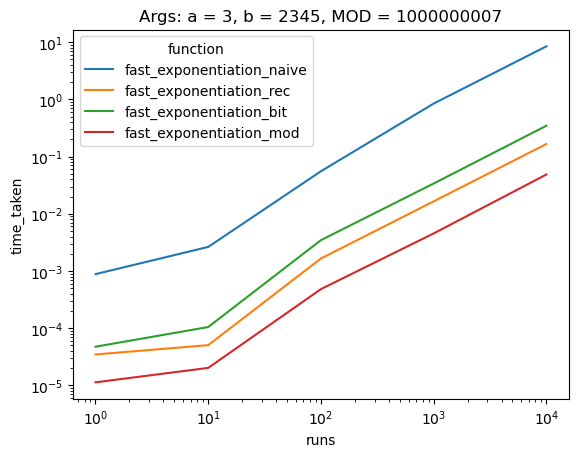

In [19]:
# ======================================================================
# Comparison of various techniques for fast exponentiation
# ======================================================================
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def fast_exponentiation_naive(a, b):
    # Calculate a**b using a for loop
    res = 1
    for _ in range(b):
        res *= a
    return res

def fast_exponentiation_rec(a, b):
    # Calculates a**b using recursive, divide-and-conquer function
    def solve(a, b):
        if b == 0:
            return 1
        if b % 2 == 0:
            val = solve(a, b//2)
            return val * val
        if b % 2 == 1:
            val = solve(a, (b-1)//2)
            return val * val * a
    return solve(a, b)

def fast_exponentiation_bit(a, b):
    # Calculates a**b using bit manipulation. Let's say a=3 and b=9. bin(b) = 1001
    # Set up the powers of "a" below the binary representation; multiply the powers at bit=1.
    #            1     0     0     1
    #          6561   81     9     3
    #         -----               ---  = 6561 * 3 = 19683 = 3**9
    res = 1
    while b > 0:
        if b & 1 == 1:
            res *= a
        a *= a
        b >>= 1
    return res

def fast_exponentiation_mod(a, b, MOD):
    # Calculates a**b % MOD using bit manipulation. Similar to bit manipulation, but modd'ed at each step.
    res = 1
    while b > 0:
        if b & 1 == 1:
            res = (res * a) % MOD
        a = (a * a) % MOD
        b >>= 1
    return res

a = 3
b = 2345
MOD = 10**9 + 7

runs = [1,10,100,1000,10000]
functions = ['fast_exponentiation_naive', 'fast_exponentiation_rec', 'fast_exponentiation_bit', 'fast_exponentiation_mod']
runtimes = {'function' : [], 'runs' : [], 'time_taken' :[]}

for run in runs:
    for function in functions:
        new_stmt = f'{function}({a},{b},{MOD})' if function == 'fast_exponentiation_mod' else f'{function}({a},{b})'
        rt = timeit.timeit(stmt=new_stmt, globals=globals(), number=run)
        runtimes['function'].append(function)
        runtimes['runs'].append(run)
        runtimes['time_taken'].append(rt)

df = pd.DataFrame(data=runtimes)
print(df)

g = sns.lineplot(x='runs', y='time_taken', data=df, hue='function')
g.set(yscale='log')
g.set(xscale='log')
g.set(title=f'Args: a = {a}, b = {b}, MOD = {MOD}')

plt.show()
